# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno


# Импорт библиотек для проверки на стат значимость

In [2]:
from scipy import stats
from scipy.stats import ttest_ind, ttest_1samp, shapiro, levene, mannwhitneyu, pearsonr, \
spearmanr, kendalltau, f_oneway, kruskal


### Параметр отображения всех столбцов

In [3]:
pd.set_option('display.max_columns', None)

### Чтение документа

In [4]:
df = pd.read_excel('F:/Рабочий стол/Итоговый проект Нетология/Empires___Puzzles_Whale.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
df_non_paying = pd.read_excel('F:/Рабочий стол/Итоговый проект Нетология/Empires___Puzzles_Non-Paying.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
df.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,NaN,1,1,Idle,Start,Loading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,NaN,1,1,Player,Pop-Up,Accept the Terms of Service,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,NaN,1,1,Campaign,Dialog Start,"начало игры, начало истории",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,NaN,1,1,Campaign,Start Battle,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,NaN,1,1,Tutorial,Advice about moves,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [7]:
df_non_paying.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Shortage3,Ended1,Ended2,Limits,New expirience,Offer Time,Team Power,Name,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1.0,1,Idle,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,Player,Privacy Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,Campaign,Dialog Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1.0,1,Campaign,Start Battle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1.0,1,Tutorial,Advice about moves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10380 non-null  datetime64[ns]
 1   Day               10380 non-null  int64         
 2   Session           10380 non-null  int64         
 3   Video #           10380 non-null  float64       
 4   Videolink         10380 non-null  object        
 5   Videolength       10380 non-null  object        
 6   Timestamp         10380 non-null  object        
 7   Timelink          0 non-null      float64       
 8   Player Level      10380 non-null  int64         
 9   Stronghold Level  10380 non-null  int64         
 10  Tag               10378 non-null  object        
 11  Action            10378 non-null  object        
 12  Info              2405 non-null   object        
 13  Shortage1         301 non-null    object        
 14  Shortage2         15 n

In [9]:
df_non_paying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8457 non-null   datetime64[ns]
 1   Day               8457 non-null   int64         
 2   Session           8457 non-null   int64         
 3   Video #           8457 non-null   float64       
 4   Videolink         8457 non-null   object        
 5   Videolength       8457 non-null   object        
 6   Timestamp         8457 non-null   object        
 7   Timelink          8457 non-null   object        
 8   Player Level      8454 non-null   float64       
 9   Stronghold Level  8457 non-null   int64         
 10  Tag               8457 non-null   object        
 11  Action            8457 non-null   object        
 12  Info              2464 non-null   object        
 13  Shortage1         311 non-null    object        
 14  Shortage2         30 non

In [10]:
df.replace(['nan'], np.NaN, inplace = True)
df_non_paying.replace(['nan'], np.NaN, inplace = True)
# Сразу заменим все некорректные nan

<Axes: >

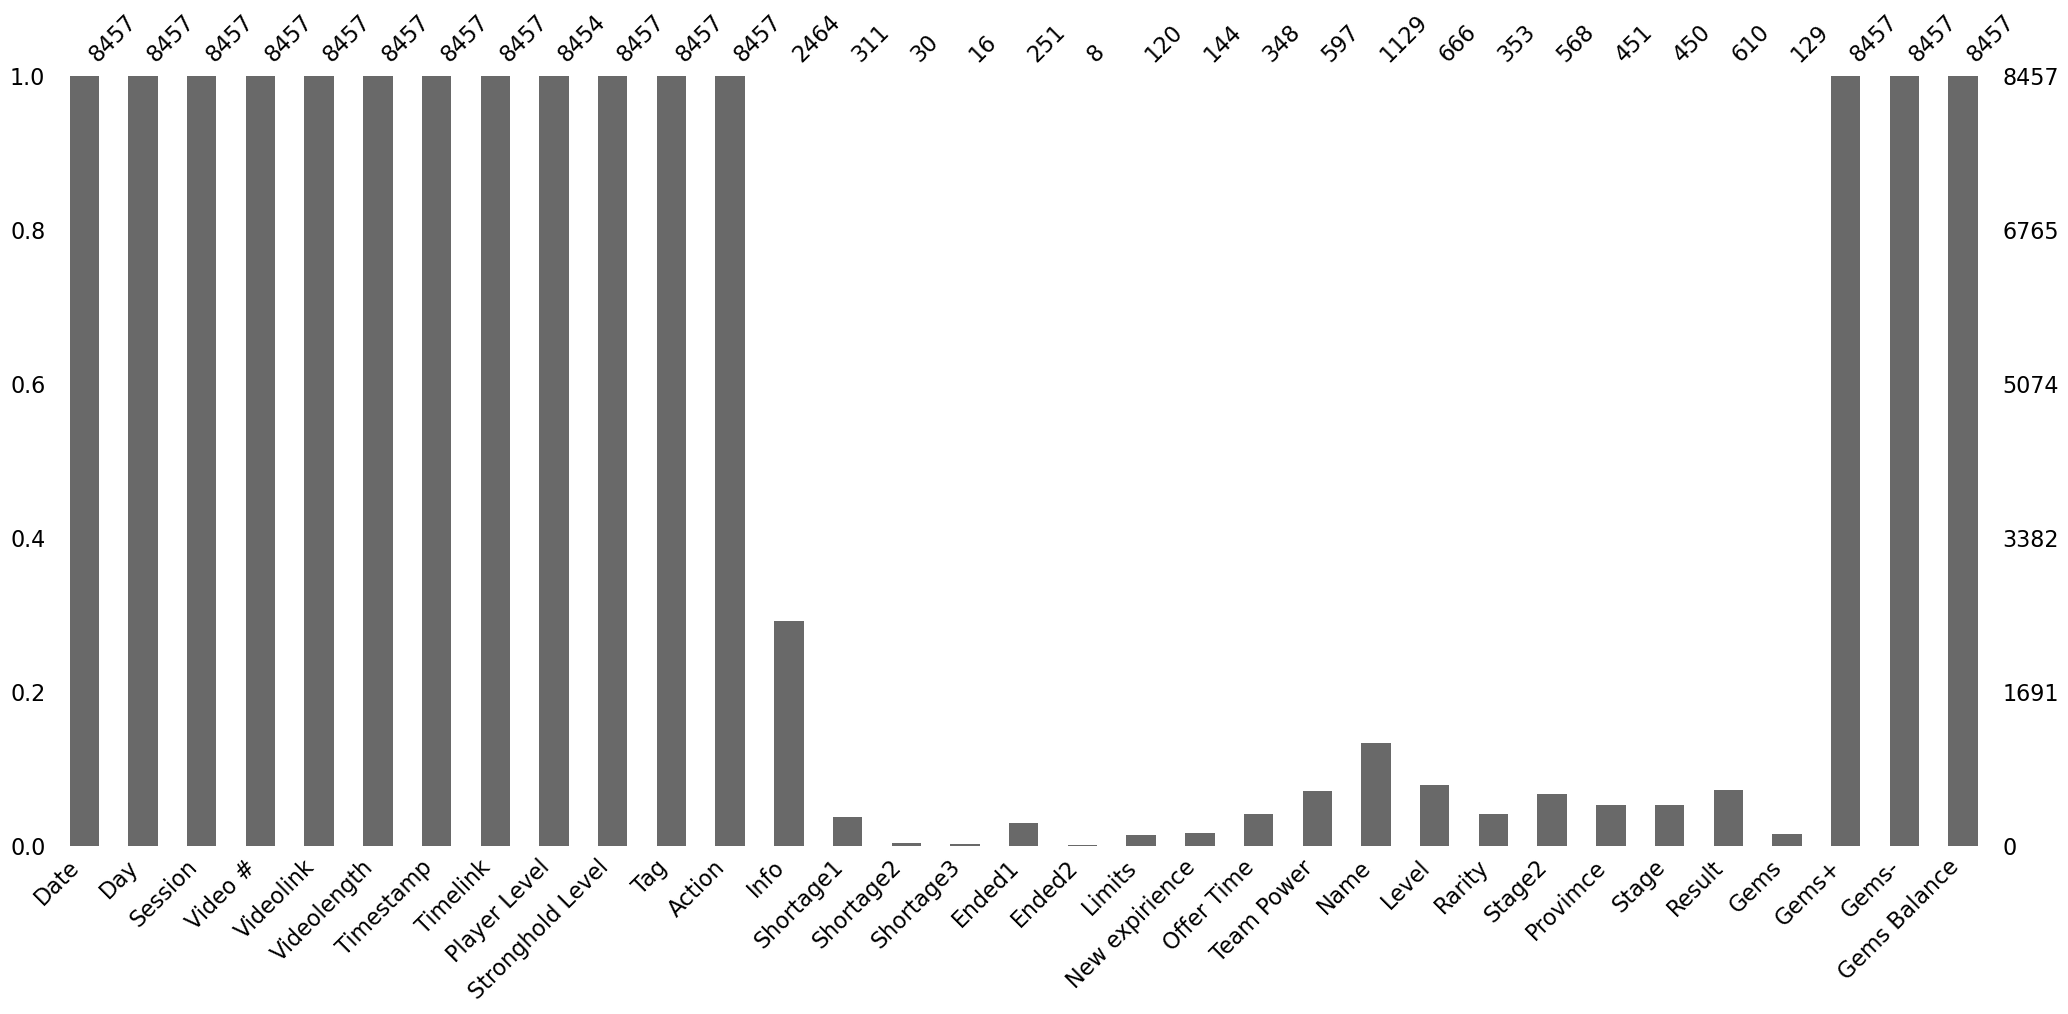

In [11]:
msno.bar(df_non_paying)

## В чем разница между 3 разными Shortage и 2 Stage?

In [12]:
df_non_paying[['Stage', 'Stage2']].dropna().tail()

,Stage,Stage2
8200,1.0,5-1
8203,2.0,5-2
8204,2.0,5-2
8227,1.0,9-1
8228,1.0,9-1


In [13]:
df[['Stage']].dropna().tail()

,Stage
10326,17-1
10328,2-3-5
10329,2-3-5
10338,12-5
10339,12-5


## Не понимаю зачем нужен обычный Stage в датасете неплатящего пользователя. Удалю его и переименую Stage2 в Stage

In [14]:
df_non_paying.drop(columns = 'Stage', inplace = True)
df_non_paying.rename(columns={'Stage2': 'Stage'}, inplace = True)

In [15]:
df_non_paying[['Stage']].dropna()

,Stage
61,1-1
63,1-1
73,1-2
74,1-2
90,1-3
...,...
8341,20
8348,20
8349,20
8351,1


# Также переименую колонку New expirience в New Experience как в другом датафрейме

In [16]:
df_non_paying.rename(columns={'New expirience': 'New Experience'}, inplace = True)

In [17]:
df_non_paying['Shortage3'].unique()

array([nan, 'Hero Level'], dtype=object)

In [18]:
df_non_paying[['Provimce']].dropna()

,Provimce
63,1.0
73,1.0
74,1.0
90,1.0
92,1.0
...,...
8200,5.0
8203,5.0
8204,5.0
8227,9.0


### Отбрасываю столбцы, которые не потребуются для анализа

In [19]:
df_non_paying.drop(columns = ['Video #', 'Videolink', 'Videolength', 'Timestamp', 'Timelink', 'Info',
                              'Shortage2', 'Shortage3', 'Ended2', 'Provimce', 'Limits', 'Offer Time', 'Info'], inplace = True)
df.drop(columns = ['Video #', 'Videolink', 'Videolength', 'Timestamp', 'Timelink'],inplace = True)

In [20]:
#df['Info'] = df['Info'].astype(str)

In [21]:
df.isnull().sum()

Date                    0
Day                     0
Session                 0
Player Level            0
Stronghold Level        0
Tag                     2
Action                  2
Info                 7975
Shortage1           10079
Shortage2           10365
Ended1              10001
Ended2              10370
Limits              10227
New Experience      10162
Offer Time          10144
Team Power           9619
Name                 8063
Level                8744
Rarity               9278
Stage                9786
Result               9699
Gems                10024
Gems+                   0
Gems-                   0
Gems Balance            0
dtype: int64

In [22]:
df_non_paying.isnull().sum()

Date                   0
Day                    0
Session                0
Player Level           3
Stronghold Level       0
Tag                    0
Action                 0
Shortage1           8146
Ended1              8206
New Experience      8313
Team Power          7860
Name                7328
Level               7791
Rarity              8104
Stage               7889
Result              7847
Gems                8328
Gems+                  0
Gems-                  0
Gems Balance           0
dtype: int64

In [23]:
df_non_paying[['Player Level']].dropna()
df_non_paying[df_non_paying['Player Level'].isnull()]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
2186,2020-10-17,4,9,NaN,4,Offers,Ninja Offers Part 3/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2188,2020-10-17,4,9,NaN,4,Offers,Ninja Offers Part 2/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2190,2020-10-17,4,9,NaN,4,Offers,Ninja Offers Part 1/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83


In [24]:
df_non_paying.loc[df_non_paying.index > 2184]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
2185,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 3/5 $9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2186,2020-10-17,4,9,NaN,4,Offers,Ninja Offers Part 3/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2187,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 2/5 $9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2188,2020-10-17,4,9,NaN,4,Offers,Ninja Offers Part 2/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2189,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 1/5 $2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,2020-10-27,14,41,14.0,8,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8453,2020-10-27,14,41,14.0,8,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8454,2020-10-27,14,41,14.0,8,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8455,2020-10-27,14,41,14.0,8,Raid,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79


## Т.к. на предыдущих и следущих строках уровень игрока равняется 7, чтобы не удалять эти строки, просто поставлю уровень игрока 7

In [25]:
df_non_paying.fillna({'Player Level': 7}, inplace=True)

In [26]:
df_non_paying.loc[df_non_paying.index > 2184]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
2185,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 3/5 $9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2186,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 3/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2187,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 2/5 $9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2188,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 2/5 50 Gems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
2189,2020-10-17,4,9,7.0,4,Offers,Ninja Offers Part 1/5 $2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,2020-10-27,14,41,14.0,8,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8453,2020-10-27,14,41,14.0,8,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8454,2020-10-27,14,41,14.0,8,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79
8455,2020-10-27,14,41,14.0,8,Raid,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,79


In [27]:
df_non_paying.isnull().sum()

Date                   0
Day                    0
Session                0
Player Level           0
Stronghold Level       0
Tag                    0
Action                 0
Shortage1           8146
Ended1              8206
New Experience      8313
Team Power          7860
Name                7328
Level               7791
Rarity              8104
Stage               7889
Result              7847
Gems                8328
Gems+                  0
Gems-                  0
Gems Balance           0
dtype: int64

## Преобразуем Player Level в int64

In [28]:
df['Player Level'] = df['Player Level'].astype('int64')
df_non_paying['Player Level'] = df_non_paying['Player Level'].astype('int64')

### Проверим 2 пустых ячейки для столбцов Tag и Action

In [29]:
df.loc[df['Tag'].isnull()]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
4947,2020-11-01,6,17,14,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4747
6666,2020-11-04,9,23,16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2941


In [30]:
df.iloc[4945:4950]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
4945,2020-11-01,6,17,14,9,Path of Valor,Reward,Дали бустер на железо на 1 день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4747
4946,2020-11-01,6,17,14,9,Path of Valor,Reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4747
4947,2020-11-01,6,17,14,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4747
4948,2020-11-01,6,17,14,9,Hero,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4747
4949,2020-11-01,6,17,14,9,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4747


In [31]:
df.iloc[6664:6668]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
6664,2020-11-04,9,23,16,11,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2941
6665,2020-11-04,9,23,16,11,Building,Start,Не хватило железа,Iron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2941
6666,2020-11-04,9,23,16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2941
6667,2020-11-04,9,23,16,11,Train,Finish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncommon,NaN,NaN,NaN,NaN,NaN,0,0,2941


### Т.к. в этих строках нет чего-либо отличительного, то я их удалю

In [32]:
df.drop(index = [4947, 6666], inplace = True)

<Axes: >

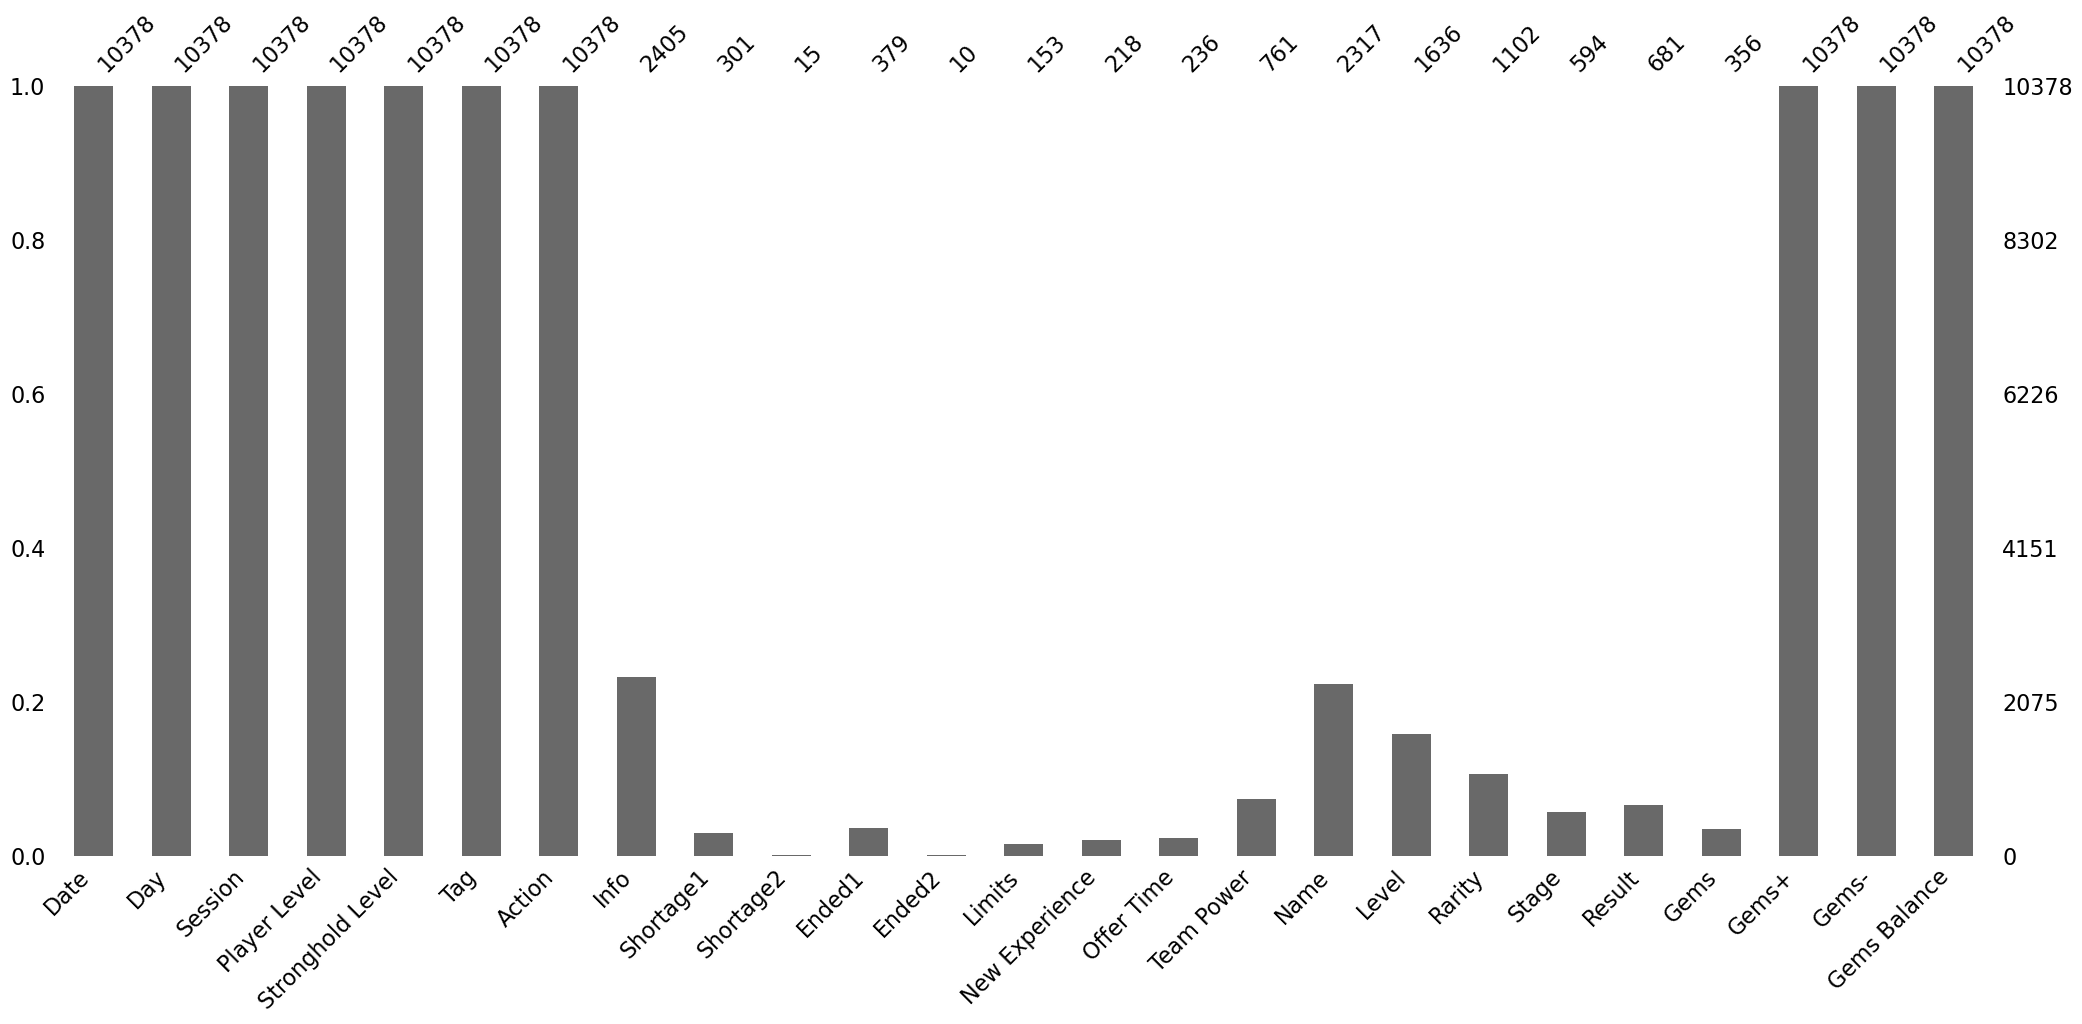

In [33]:
msno.bar(df)

### Для следующих визуализаций я буду использовать колонки Shortage1 и Ended1, после чего удалю из-за большого количества пропусков, вторые их колонки не буду использовать из-за очень малого количества не самых важных данных

# Проверка на выбросы и их анализ

<Axes: >

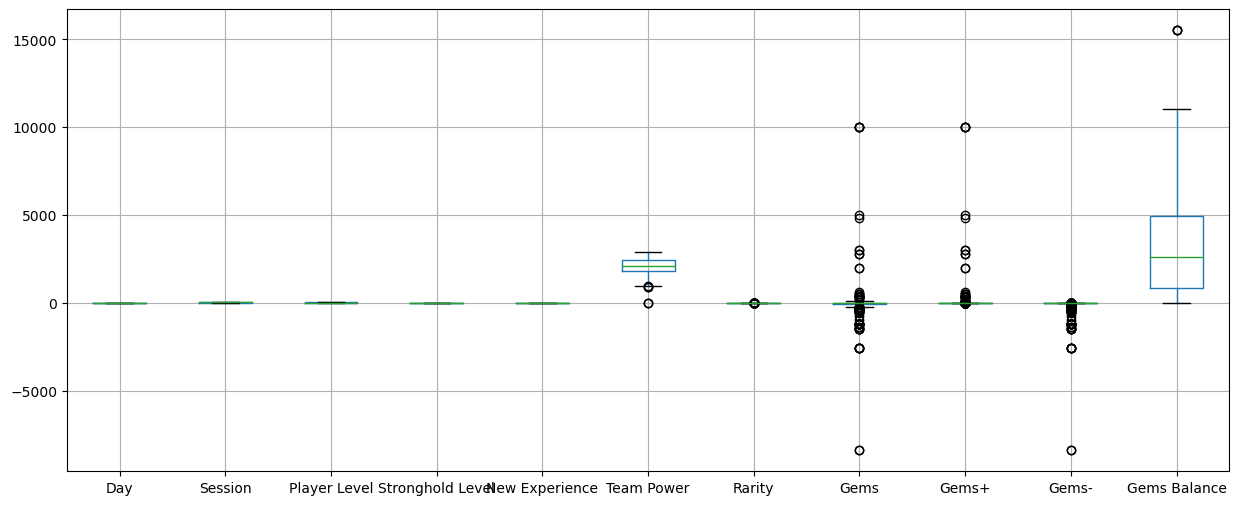

In [34]:
plt.figure(figsize = (15,6))
df.boxplot()

In [35]:
df.loc[df['Gems-'] < -8000]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
7268,2020-11-05,10,25,16,11,Summon,Atlantis Summon,Первый такой большой призыв,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8400.0,0,-8400,7116
8181,2020-11-06,11,27,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8400.0,0,-8400,2621


In [36]:
df.loc[df['Action'] == 'Atlantis Summon']

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
7268,2020-11-05,10,25,16,11,Summon,Atlantis Summon,Первый такой большой призыв,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8400.0,0,-8400,7116
7591,2020-11-05,10,26,16,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6420
8176,2020-11-06,11,27,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6221
8181,2020-11-06,11,27,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8400.0,0,-8400,2621
8401,2020-11-06,11,28,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2972
8403,2020-11-06,11,28,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2972
8405,2020-11-06,11,28,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2972


In [37]:
df.loc[(df.index > 7264) & (df.index < 7270)]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
7265,2020-11-05,10,25,16,11,Purchase,10000 Gems $99.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,10000,0,15516
7266,2020-11-05,10,25,16,11,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,15516
7267,2020-11-05,10,25,16,11,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,15516
7268,2020-11-05,10,25,16,11,Summon,Atlantis Summon,Первый такой большой призыв,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8400.0,0,-8400,7116
7269,2020-11-05,10,25,16,11,Summon,New Hero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rigard,1,4.0,NaN,NaN,NaN,0,0,7116


In [38]:
df.loc[(df.index > 8178) & (df.index < 8185)]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
8179,2020-11-06,11,27,17,11,Purchase,4800 Gems $49.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,4800,0,11021
8180,2020-11-06,11,27,17,11,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,11021
8181,2020-11-06,11,27,17,11,Summon,Atlantis Summon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8400.0,0,-8400,2621
8182,2020-11-06,11,27,17,11,Summon,New Hero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prisca,1,3.0,NaN,NaN,NaN,0,0,2621
8183,2020-11-06,11,27,17,11,Summon,New Hero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vivica,1,5.0,NaN,NaN,NaN,0,0,2621
8184,2020-11-06,11,27,17,11,Summon,New Hero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carver,1,3.0,NaN,NaN,NaN,0,0,2621


### Выброс на трату гемов обоснован. Игрок тратил большое количество гемов дважды на призыв персонажей из акции Atlantis Summon, оттого и низкие показатели Gems и Gems-

In [39]:
df.loc[df['Gems Balance'] > 15000]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
7265,2020-11-05,10,25,16,11,Purchase,10000 Gems $99.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,10000,0,15516
7266,2020-11-05,10,25,16,11,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,15516
7267,2020-11-05,10,25,16,11,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,15516


### Выброс на баланс гемов обоснован. Игрок разово приобрел акцию 10000 Gems за 99.99 долларов, отчего параметр сильно возрос. В остальном ничего критичного

<Axes: >

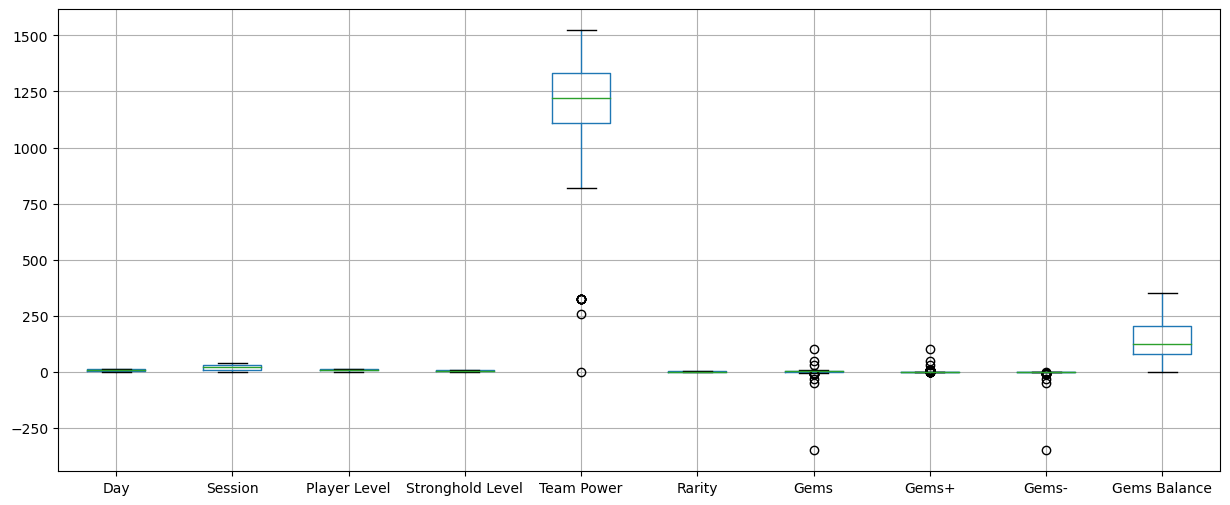

In [40]:
plt.figure(figsize = (15,6))
df_non_paying.boxplot()

In [41]:
df_non_paying.loc[df_non_paying['Gems-'] < -250]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
6711,2020-10-25,12,34,12,7,Summon,Valhalla Summon,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,-350.0,0,-350,0


In [42]:
df_non_paying.loc[(df_non_paying.index > 6707) & (df_non_paying.index < 6715)]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
6708,2020-10-25,12,34,12,7,Missions,Reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3,0,350
6709,2020-10-25,12,34,12,7,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,350
6710,2020-10-25,12,34,12,7,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,350
6711,2020-10-25,12,34,12,7,Summon,Valhalla Summon,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,-350.0,0,-350,0
6712,2020-10-25,12,34,12,7,Summon,Pop-Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
6713,2020-10-25,12,34,12,7,Summon,New Hero,NaN,NaN,NaN,NaN,Grevle,1,3.0,NaN,NaN,NaN,0,0,0
6714,2020-10-25,12,34,12,7,Summon,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


### Выброс на трату гемов обоснован. Игрок потратил все 350 гемов, которые у него были на балансе, на призыв героя из акции Valhalla Summon. В остальном ничего критичного

# Расчеты

In [43]:
print(f'Количество сессий платящего пользователя {df["Session"].nunique()}')
print(f'Количество сессий не платящего пользователя {df_non_paying["Session"].nunique()}')

Количество сессий платящего пользователя 35
Количество сессий не платящего пользователя 41


In [44]:
viewed_ads = len(df[(df['Tag'] == 'Mystic Vision') & (df['Action'] == 'Finish')])
viewed_ads2 = len(df_non_paying[(df_non_paying['Tag'] == 'Mystic Vision') & 
                                (df_non_paying['Action'] == 'Finish')])
print('Количество просмотренной рекламы платящего игрока', viewed_ads)
print('Количество просмотренной рекламы не платящего игрока', viewed_ads2)

Количество просмотренной рекламы платящего игрока 11
Количество просмотренной рекламы не платящего игрока 16


In [45]:
сompleted_raids = len(df[(df['Tag'] == 'Raid') & (df['Action'] == 'Finish Battle')])
сompleted_raids2 = len(df_non_paying[(df_non_paying['Tag'] == 'Raid') &
                                     (df_non_paying['Action'] == 'Finish Battle')])
print('Количество рейдов платящего игрока', сompleted_raids)
print('Количество рейдов не платящего игрока', сompleted_raids2)

Количество рейдов платящего игрока 210
Количество рейдов не платящего игрока 175


In [46]:
viewed_summon = len(df[(df['Tag'] == 'Summon') & (df['Action'] == 'Start')])
viewed_summon2 = len(df_non_paying[(df_non_paying['Tag'] == 'Summon') & (df_non_paying['Action'] == 'Start')])

print('Количество просмоторв призывов платящего игрока', viewed_summon)
print('Количество просмоторв призывов не платящего игрока', viewed_summon2)

Количество просмоторв призывов платящего игрока 200
Количество просмоторв призывов не платящего игрока 121


In [149]:
viewed_event = len(df[(df['Tag'] == 'Event') & (df['Action'] == 'Start')])
viewed_event2 = len(df_non_paying[(df_non_paying['Tag'] == 'Event') & (df_non_paying['Action'] == 'Start')])

print('Количество просмоторв ивентов платящего игрока', viewed_event)
print('Количество просмоторв ивентов не платящего игрока', viewed_event2)

Количество просмоторв ивентов платящего игрока 19
Количество просмоторв ивентов не платящего игрока 17


In [48]:
viewed_vip = len(df[(df['Tag'] == 'VIP')])
viewed_vip2 = len(df_non_paying[(df_non_paying['Tag'] == 'VIP')])

print('Количество просмоторв VIP пропуска платящего игрока', viewed_vip)
print('Количество просмоторв VIP пропуска не платящего игрока', viewed_vip2)

Количество просмоторв VIP пропуска платящего игрока 19
Количество просмоторв VIP пропуска не платящего игрока 70


In [49]:
viewed_shop = len(df[(df['Tag'] == 'Shop')])
viewed_shop2 = len(df_non_paying[(df_non_paying['Tag'] == 'Shop')])

print('Количество просмоторв магазина платящего игрока', viewed_shop)
print('Количество просмоторв магазина не платящего игрока', viewed_shop2)

Количество просмоторв магазина платящего игрока 216
Количество просмоторв магазина не платящего игрока 145


In [50]:
end_event = len(df[(df['Tag'] == 'Event') & (df['Action'] == 'Finish Battle')])
end_event2 = len(df_non_paying[(df_non_paying['Tag'] == 'Event') & (df_non_paying['Action'] == 'Finish Battle')])

print('Количество пройденных ивентов платящего игрока', end_event)
print('Количество пройденных ивентов не платящего игрока', end_event2)

Количество пройденных ивентов платящего игрока 42
Количество пройденных ивентов не платящего игрока 31


# Визуализация и анализ 

# Нехватка чего на каждом уровне для каждого пользователя

In [51]:
# Платящий пользователь
table_data = df[['Day', 'Shortage1', 'Player Level']].dropna()
pvt_player_level_x_shortage = pd.pivot_table(data = table_data, values = 'Player Level', index = 'Shortage1', columns = ['Player Level'], aggfunc = 'count',
              fill_value = 0)
pvt_player_level_x_shortage

Player Level,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Shortage1,,,,,,,,,,,,,,,,,,,
Energy,0,1,1,0,0,0,2,2,1,1,3,0,3,5,4,2,3,5,2
Food,0,9,3,0,7,1,10,5,5,3,5,7,9,10,3,9,4,13,5
Heroes,0,0,0,0,0,2,0,0,0,0,6,1,1,1,0,0,1,1,1
Iron,1,3,2,3,4,6,3,3,8,4,3,4,6,10,2,9,5,4,2
Materials,0,0,0,0,0,0,0,0,2,0,0,1,0,2,0,2,1,0,0
Recruits,0,0,0,0,0,0,0,2,0,1,0,1,2,2,2,3,2,1,1
Troops,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
blank,1,5,1,0,2,4,3,3,2,0,1,3,0,4,0,1,2,1,1


### Рекруты и войска это разное или одно и то же? Для удобства объединю в рекрутов

In [52]:
df['Shortage1'].replace('Troops', 'Recruits', inplace = True)

In [53]:
# НЕплатящий пользователь
table_data = df_non_paying[['Day', 'Shortage1', 'Player Level']].dropna()
pvt_non_paying_player_level_x_shortage = pd.pivot_table(data = table_data, values = 'Player Level', 
                                                        index = 'Shortage1', columns = ['Player Level'], aggfunc = 'count',
                                                        fill_value = 0)
pvt_non_paying_player_level_x_shortage

Player Level,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Shortage1,,,,,,,,,,,,,,
Energy,0,1,0,0,2,0,0,2,2,3,5,7,2,5
Food,1,8,4,6,9,6,14,4,34,4,21,14,10,7
Heroes,0,0,0,0,0,8,6,3,2,3,4,11,2,6
Iron,0,2,0,0,0,1,3,0,0,1,0,2,1,0
Materials,0,0,0,0,0,0,1,3,0,0,0,0,0,0
Rare heroes,0,0,0,0,1,1,1,0,0,0,2,5,0,1
Recruits,0,0,0,0,0,0,0,0,1,0,0,3,0,0
blank,1,6,1,6,2,0,3,1,11,3,10,7,2,13


### Обнаружено, что у неплатящего пользователя была нехватка редких героев? Соединим редких героев с героями

In [54]:
df_non_paying['Shortage1'].replace('Rare heroes', 'Heroes', inplace = True)

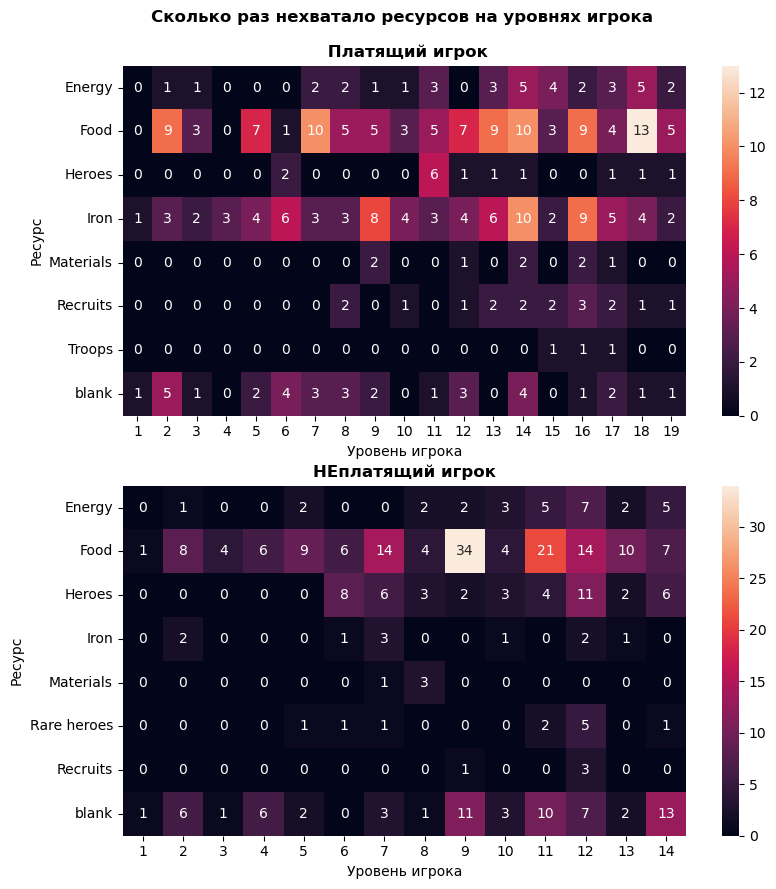

In [55]:
fig = plt.figure(figsize = (20,10))

# Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_shortage, annot = True, ax = ax1)
ax1.set_title('Сколько раз нехватало ресурсов на уровнях игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень игрока')
ax1.set_ylabel('Ресурс')


# НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_non_paying_player_level_x_shortage, annot = True, ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уровень игрока')
ax2.set_ylabel('Ресурс')
plt.show()

### Можно заметить, что у обоих пользователей пища кончалась довольно часто и неоднократно, но у неплатящего была нехватка аж 34 раза на 9 уровне и 21 на 11. Связано с улучшением героев, т.к. оно требует больше всего пищи?
### Что интересно, у неплатящего пользователя нехватка железа была значительно реже, чем у платящего. Связано со скоростью развития?
### Да и в целом у платящего игрока нехватка чего-либо была чаще, пусть и не всегда большое количество раз

# Какие ресурсы кончились на каждом уровне

In [56]:
# Платящий пользователь
table_data = df[['Day', 'Ended1', 'Player Level']].dropna()
pvt_player_level_x_ended = pd.pivot_table(data = table_data, values = 'Player Level', index = 'Ended1', columns = ['Player Level'], aggfunc = 'count',
              fill_value = 0)
pvt_player_level_x_ended

Player Level,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Ended1,,,,,,,,,,,,,,,,,,
Attempts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Energy,2,1,0,2,3,3,5,6,4,9,10,14,15,13,13,17,22,11
Food,4,2,1,6,1,3,2,8,1,3,5,5,10,2,7,6,6,1
Gems,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0
Heroes,1,2,1,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0
Iron,1,1,1,1,3,3,2,3,1,0,2,4,4,1,5,3,0,1
Materials,0,1,0,0,0,0,0,1,0,0,1,0,3,2,12,8,1,1
Recruits,0,0,0,0,1,2,4,2,4,5,7,8,9,3,7,9,10,5


In [57]:
# НЕплатящий пользователь
table_data = df_non_paying[['Day', 'Ended1', 'Player Level']].dropna()
pvt_non_paying_player_level_x_ended = pd.pivot_table(data = table_data, values = 'Player Level', index = 'Ended1', columns = ['Player Level'], aggfunc = 'count',
              fill_value = 0)
pvt_non_paying_player_level_x_ended

Player Level,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Ended1,,,,,,,,,,,,,,
Energy,0,3,2,0,2,6,7,8,14,8,14,17,10,17
Food,1,3,2,5,5,1,9,4,11,9,18,3,7,7
Heroes,0,0,0,0,2,1,3,0,0,2,1,4,1,2
Iron,0,3,0,0,1,3,1,1,0,1,1,0,0,0
Materials,0,0,0,0,0,0,4,5,0,0,1,0,0,0
Recruits,0,0,0,0,1,0,3,2,6,0,3,4,2,0


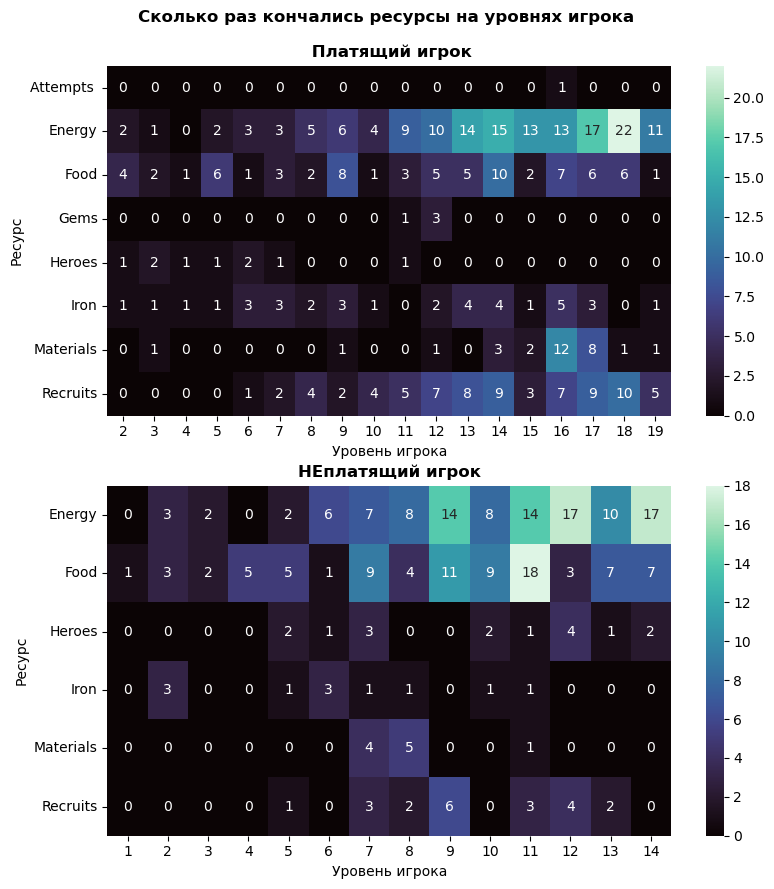

In [58]:
fig = plt.figure(figsize = (20,10))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_ended, annot = True, cmap = 'mako', ax = ax1)
ax1.set_title('Сколько раз кончались ресурсы на уровнях игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень игрока')
ax1.set_ylabel('Ресурс')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_non_paying_player_level_x_ended, annot = True, cmap = 'mako', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уровень игрока')
ax2.set_ylabel('Ресурс')
plt.show()

### Больше всего у обоих игроков кончалась именно энергия. Она кончалась на нескольких уровнях больше, чем что-либо другое. Также относительно часто кончались рекруты и еда.
### Зато попытки кончались у платящего игрока лишь один раз, у неплатящего же ни разу, как и гемы. Это может говорить о том, что баланс требуемых попыток и их восполнения хорошо сбалансированны

# Получение нового опыта

In [59]:
# Платящий игрок
table_data = df[['Player Level', 'New Experience', 'Tag']].dropna()
pvt_player_level_x_newex_tag = pd.pivot_table(data = table_data, values = 'New Experience', index = 'Tag', 
                                              columns = 'Player Level', aggfunc = 'count',
              fill_value = 0)
pvt_player_level_x_newex_tag

Player Level,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,18,19
Tag,,,,,,,,,,,,,,,,,
Alliance,0,0,0,4,2,0,0,0,1,0,0,1,0,0,0,0,0
Alliance Wars,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Base,4,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0
Building,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Buy,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Buy res i,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Campaign,14,2,2,2,2,0,2,0,0,0,0,3,0,2,0,0,0
Craft,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Event,0,0,0,0,0,0,0,0,0,8,2,0,0,0,1,1,1


In [60]:
# НЕплатящий игрок
table_data = df_non_paying[['Player Level', 'New Experience', 'Tag']].dropna()
pvt_non_paying_player_level_x_newex_tag = pd.pivot_table(data = table_data, values = 'New Experience', index = 'Tag', 
                                              columns = 'Player Level', aggfunc = 'count',
              fill_value = 0)
pvt_non_paying_player_level_x_newex_tag

Player Level,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Tag,,,,,,,,,,,,,,
Alliance,0,0,0,6,2,0,1,0,0,1,1,0,0,0
Base,0,0,0,0,0,0,0,0,0,2,0,0,0,0
Building,10,3,0,0,6,0,2,0,0,0,0,0,0,0
Buy,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Campaign,11,2,0,0,3,1,0,2,0,0,0,0,0,0
Craft,2,0,0,0,0,1,0,0,0,0,0,0,0,0
Event,0,0,0,0,0,0,0,0,0,3,0,0,0,0
Gathering,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Hero,2,0,0,0,0,0,0,0,0,0,0,1,0,0


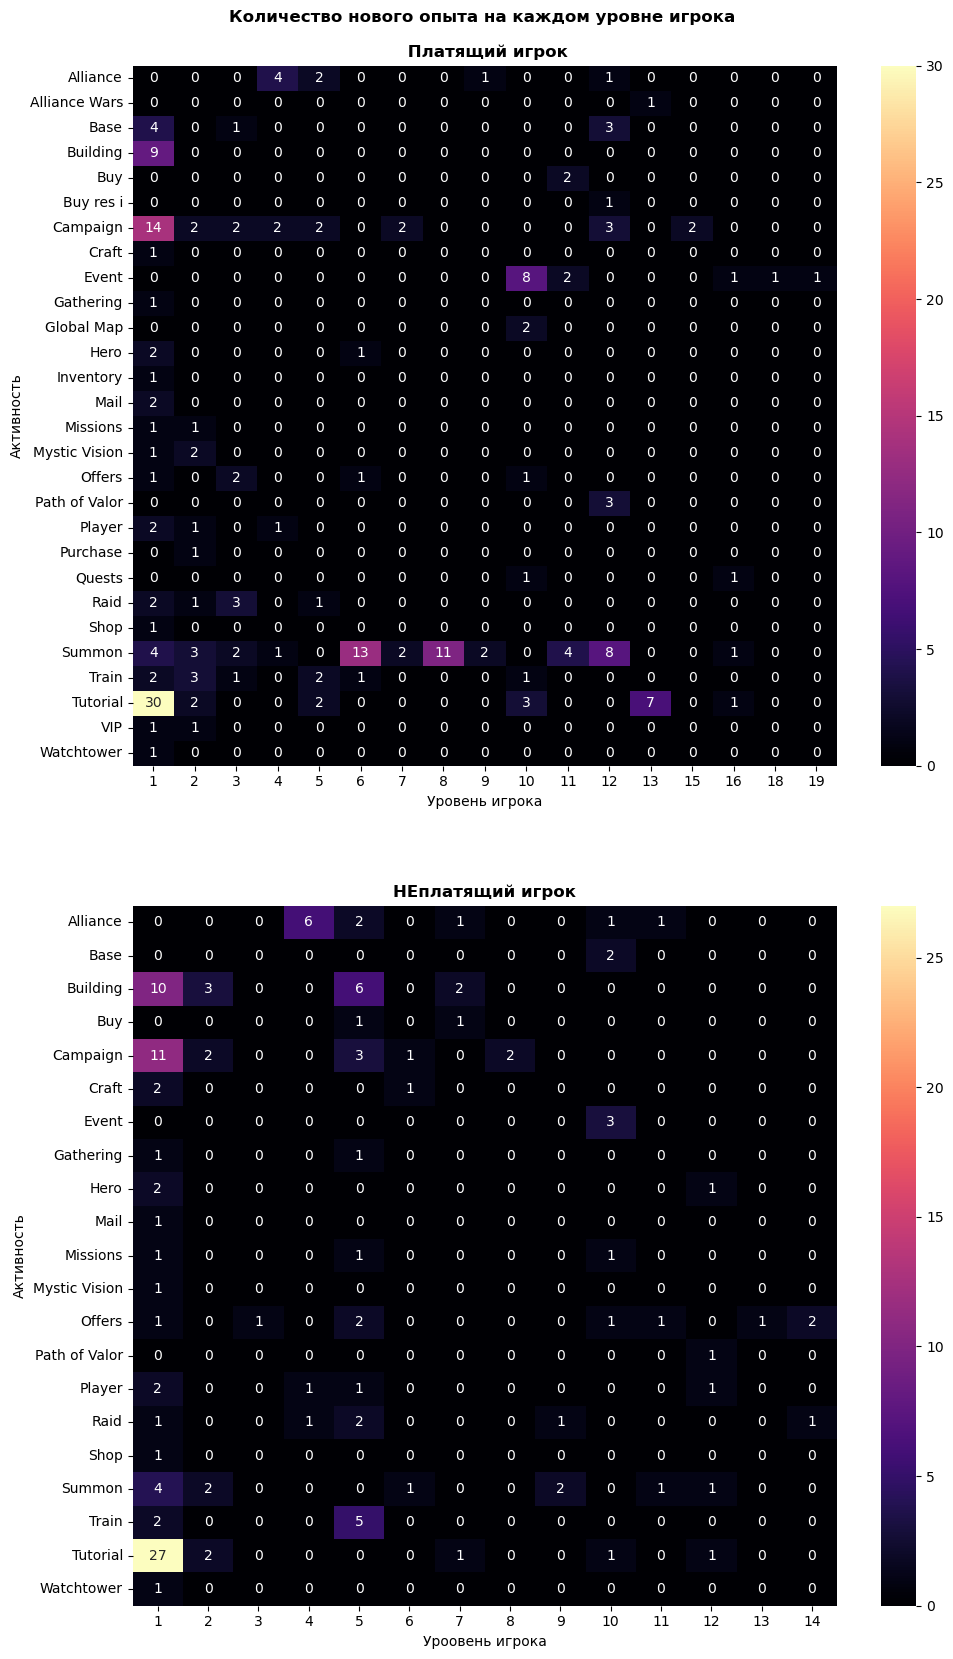

In [61]:
fig = plt.figure(figsize = (25,20))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_newex_tag, annot = True, cmap = 'magma', ax = ax1)
ax1.set_title('Количество нового опыта на каждом уровне игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень игрока')
ax1.set_ylabel('Активность')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_non_paying_player_level_x_newex_tag, annot = True, cmap = 'magma', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уроовень игрока')
ax2.set_ylabel('Активность')
plt.show()

### Самое большое количество нового опыта оба игрока получают именно на обучении, строительстве и кампании.
### У платящего пользователя, в отличие от неплатящего, наблюдается так же большое количество нового опыта за призывы героев
### Примечательное отличие, неплатящий игрок получил больше нового опыта за активность в альянсе, нежели платящий
### Также насчет ивентов, оба игрока получили к ним доступ на 10 уровне, и если платящий игрок еще получал новый опыт в течение следующих своих уровней, неплатящий ничего не получал

In [62]:
df.drop(columns = ['Shortage1', 'Shortage2', 'Ended1', 'Ended2', 'Limits', 'New Experience', 'Offer Time'], inplace = True)
#df.drop(columns = ['Gems', 'Gems+', 'Gems-'])

# Попарный анализ параметров

# Матрица корреляции

C:\Users\user\AppData\Local\Temp\ipykernel_14792\1091816628.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True)


<Axes: >

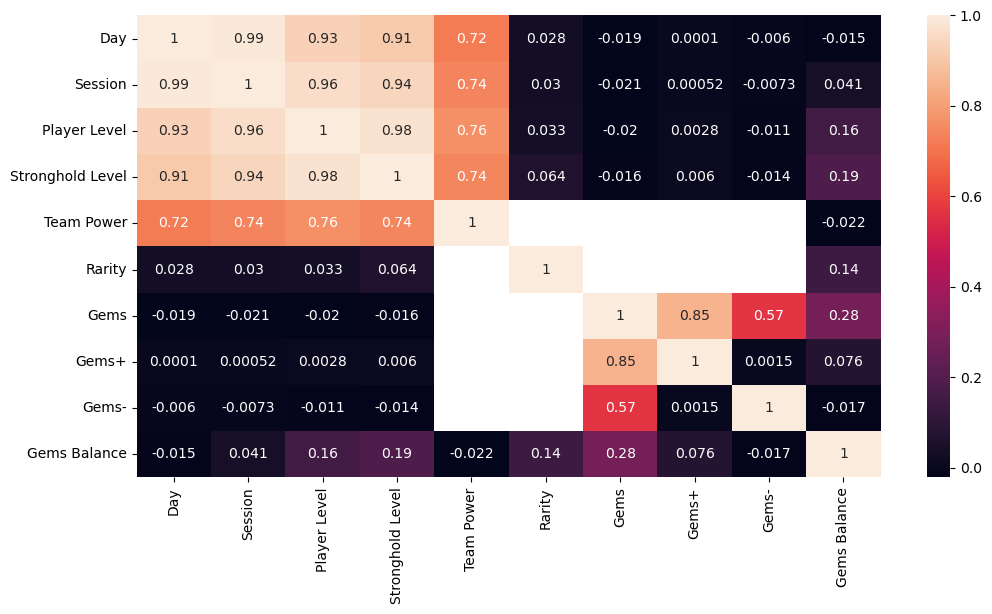

In [63]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df.corr(), annot = True)

C:\Users\user\AppData\Local\Temp\ipykernel_14792\2954959407.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_non_paying.corr(), annot = True)


<Axes: >

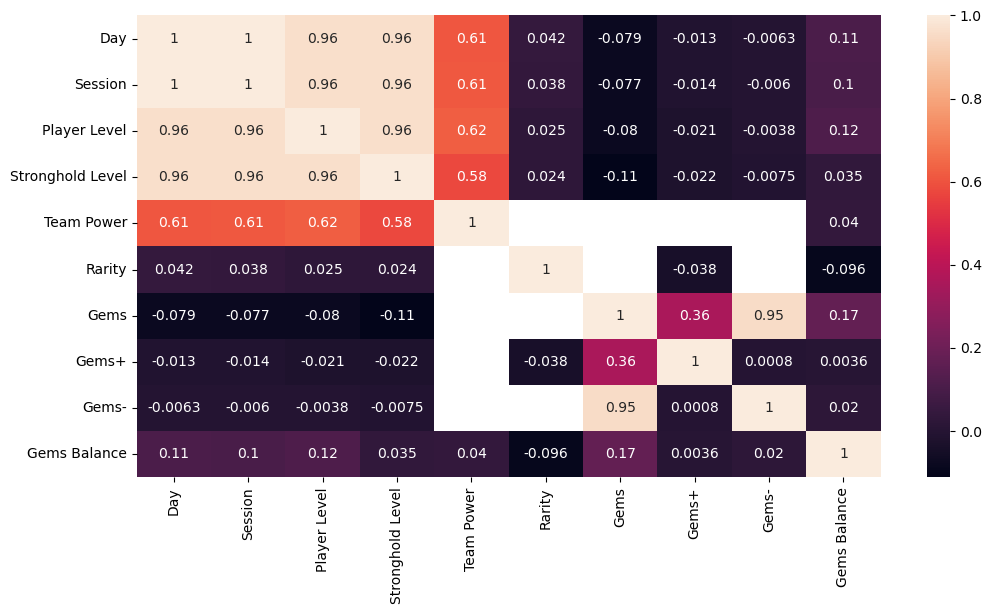

In [64]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df_non_paying.corr(), annot = True)

### Наибольшая корреляция наблюдается между днями и сессиями, уровнями и днями и сессиями, мощью команды и всеми предыдущими параметрами, что вполне логично. Больше играешь - больше уровень, больше сессий, больше мощь

# Построение матрицы диаграмм рассеивания

## Платящий пользователь

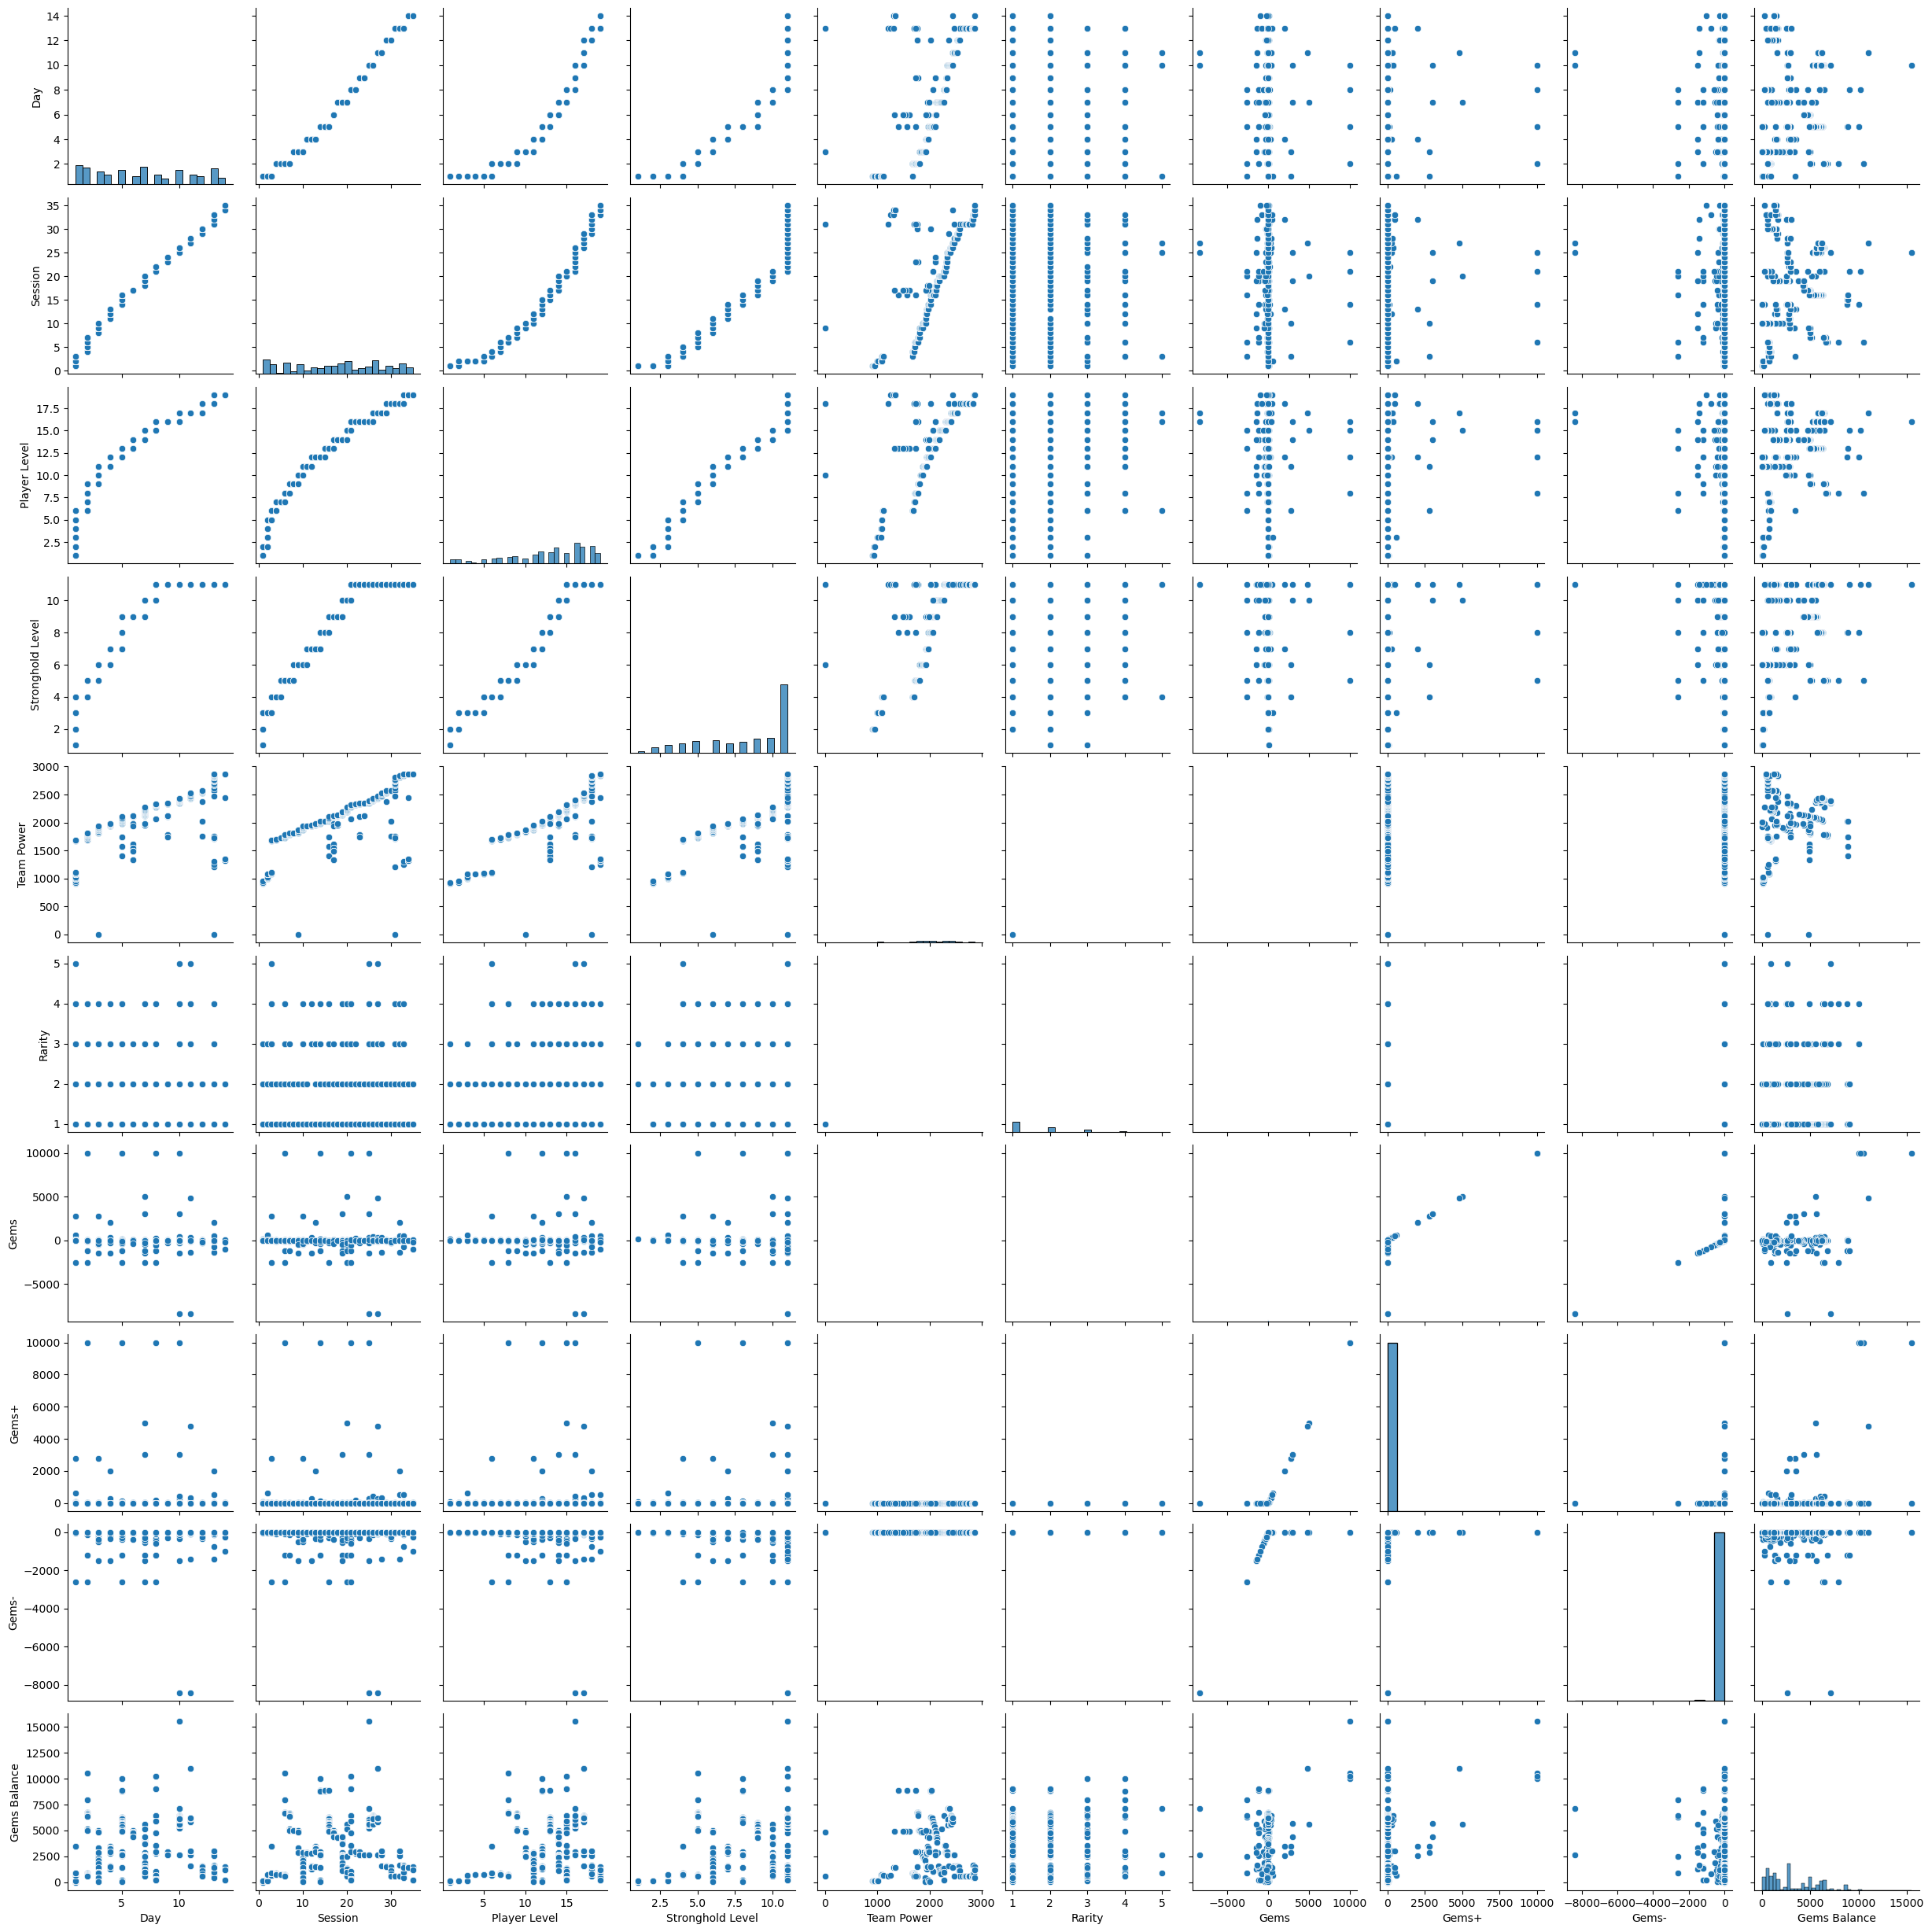

In [65]:
sns.pairplot(df)
plt.show()

## Неплатящий пользователь

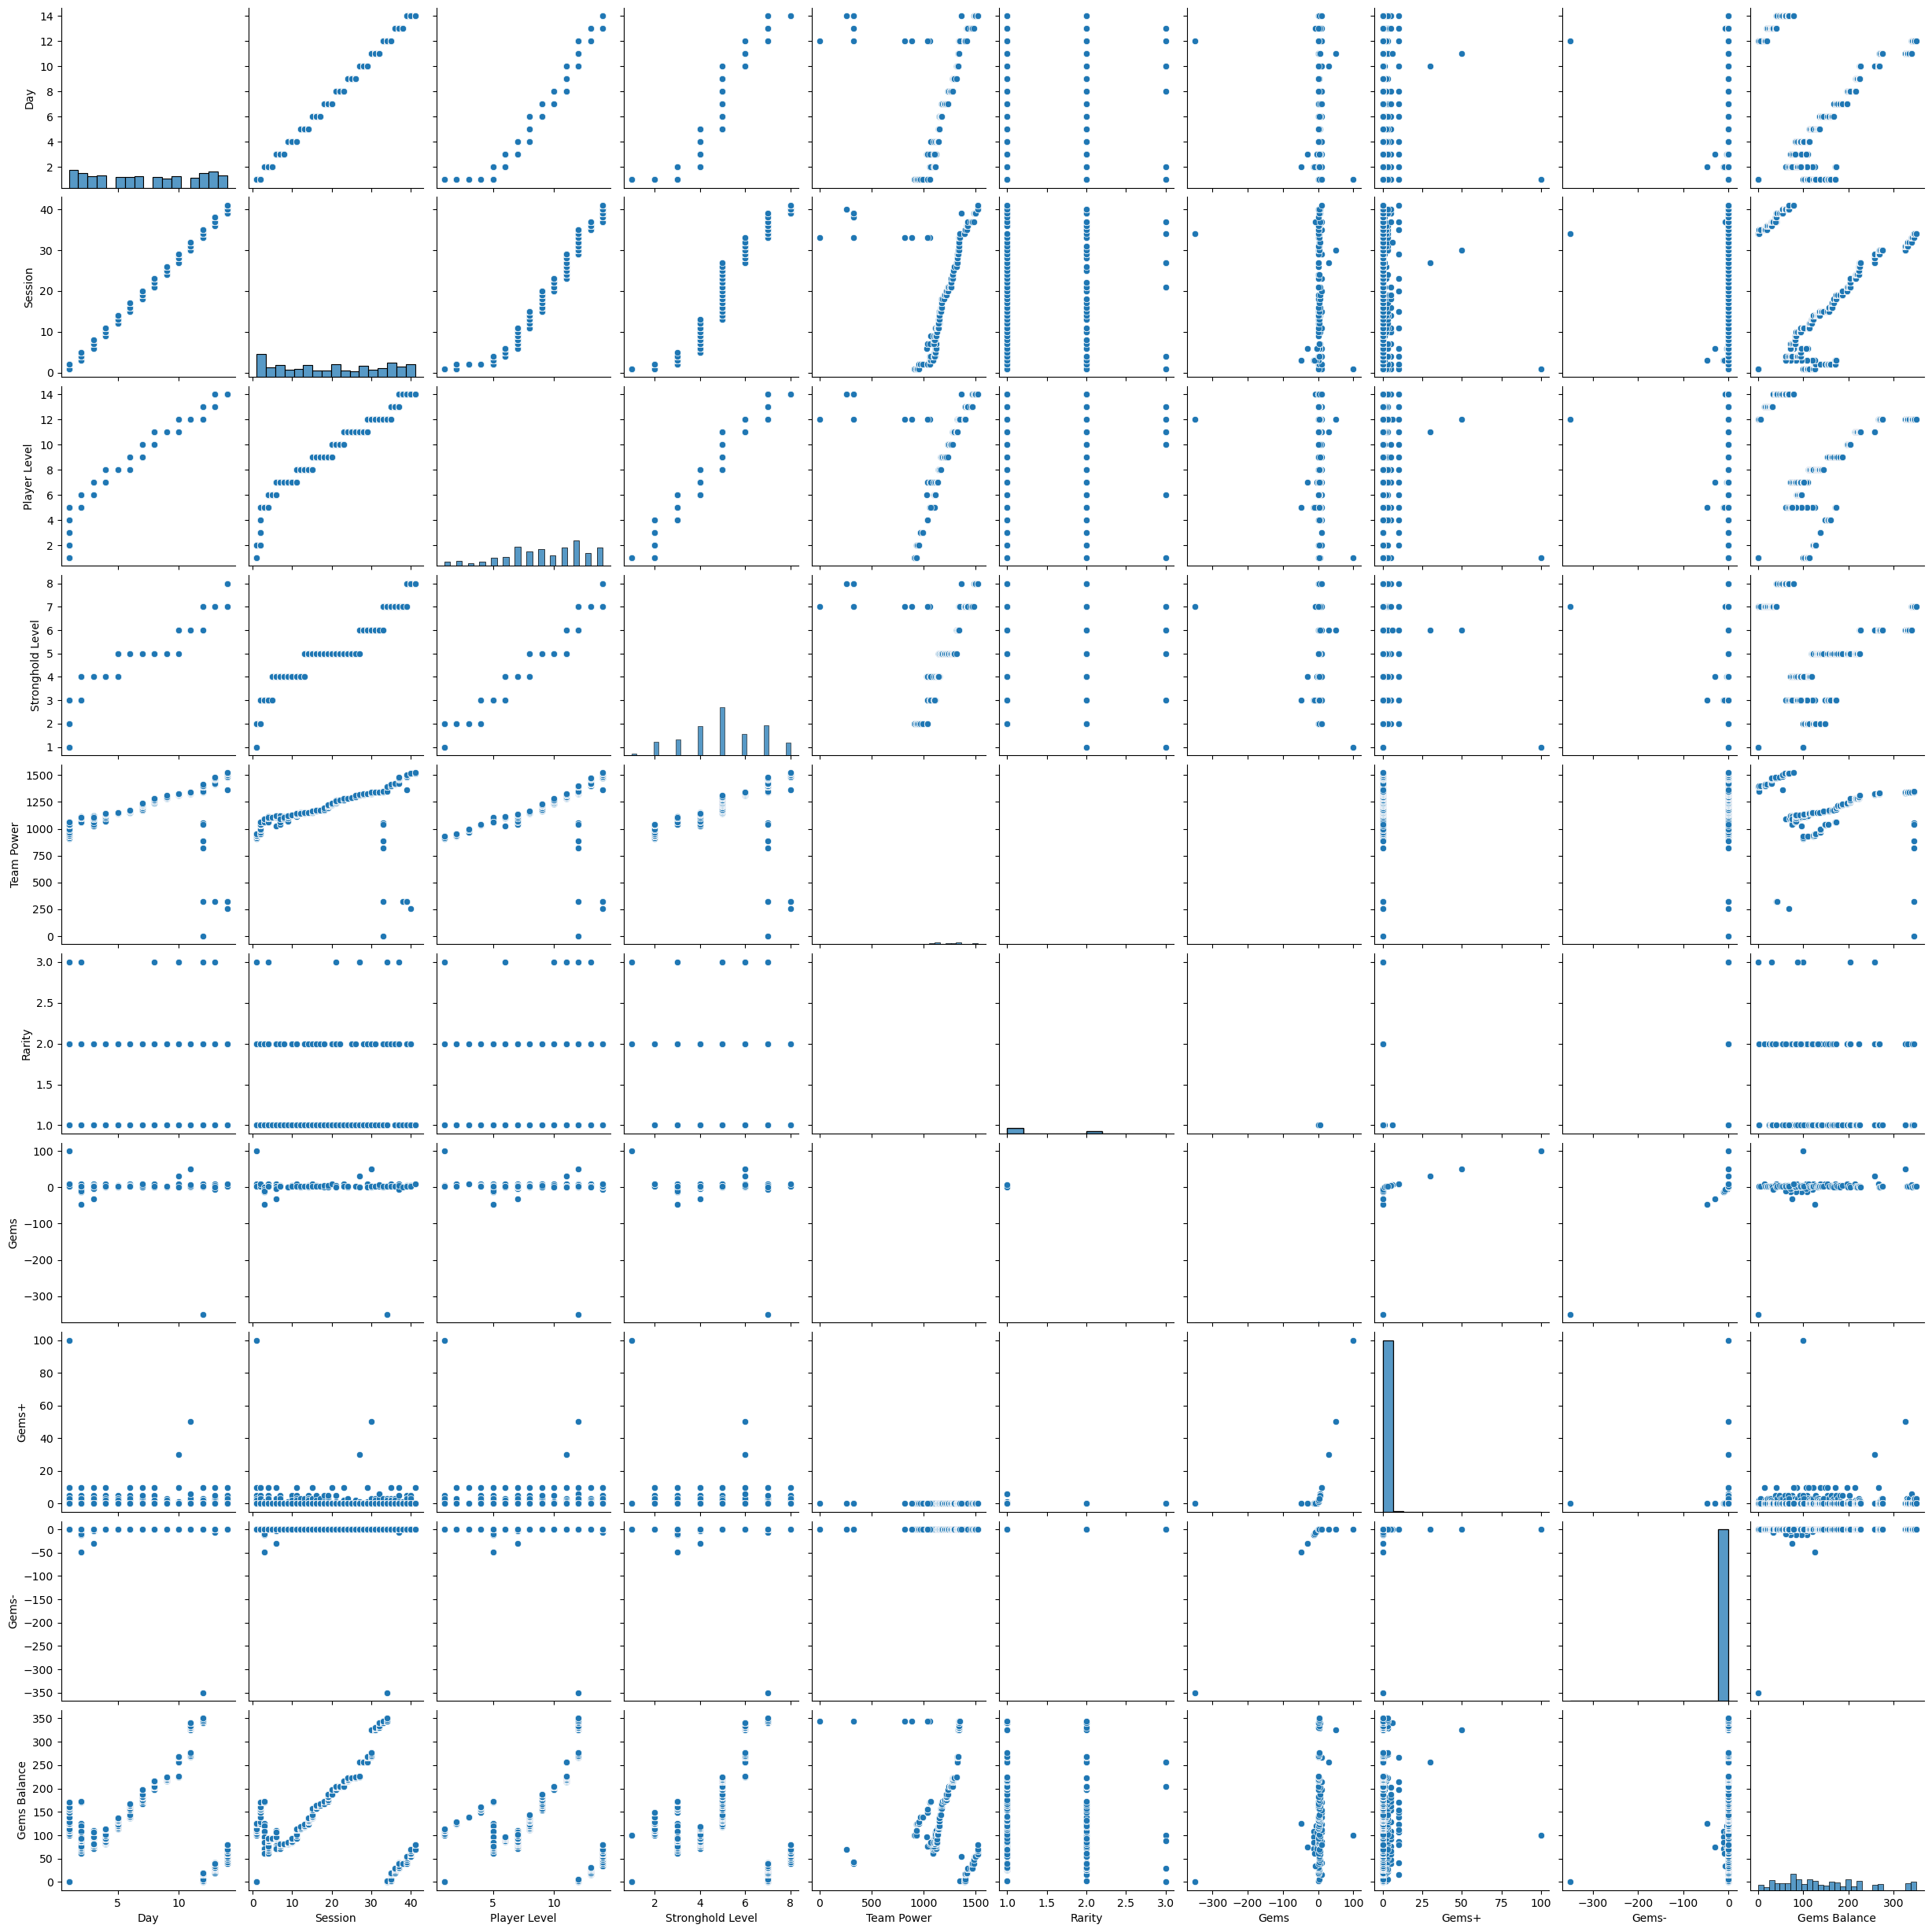

In [66]:
sns.pairplot(df_non_paying)
plt.show()

### Какую-либо линейную зависимость или приближенную к ней можно заметить лишь между такими параметрами, как: День и сессия, день/сессия и уровень игрока, день/сессия/уровень игрока и уровень главного здания и некоторую зависимость день/сессия/уровень игрока/уровень здания и мощь отряда
### В принципе, никаких новых открытий после корреляционного анализа

# Мощь отряда

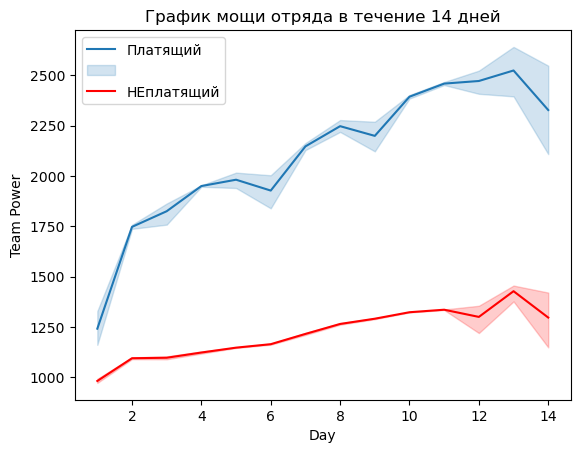

In [67]:
# Платящий игрок
lineplot_day_x_team_power = df[['Day', 'Team Power']]
lineplot_day_x_team_power
sns.lineplot(data = lineplot_day_x_team_power, x = 'Day', y = 'Team Power')

# НЕплатящий игрок
lineplot_day_x_team_power2 = df_non_paying[['Day', 'Team Power']]
sns.lineplot(data = lineplot_day_x_team_power2, x = 'Day', y = 'Team Power', color = 'r')
plt.title('График мощи отряда в течение 14 дней')
plt.legend(['Платящий', '', 'НЕплатящий'])

## Интересно узнать, почему наблюдается сильный спад мощи с 13 дня

In [68]:
lineplot_day_x_team_power.loc[(lineplot_day_x_team_power['Day'] > 12) & (lineplot_day_x_team_power['Team Power'] < 2500)].dropna()

,Day,Team Power
9044,13,0.0
9051,13,1212.0
9059,13,1762.0
9060,13,1762.0
9061,13,1762.0
9064,13,1707.0
9065,13,1707.0
9066,13,1707.0
9069,13,1729.0
9070,13,1729.0


In [69]:
df.loc[df['Team Power'] < 100]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
2517,2020-10-29,3,9,10,6,Missions,New Hero,герой-тренер для прокачки героев,1.0,Trainer Hero,20,1.0,NaN,NaN,NaN,0,0,4810
9044,2020-11-08,13,31,18,11,Tournament,Edit Team Finish,Убрала всех героев из отряда,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,597


## Откуда нулевое и единичное значение мощи?
## Оказалось, игра учитывает каждое редактирование отряда, из-за чего при полностью пустом отряде в логах стоит 0. Почему стоит 1 в логах, так и не понял

In [70]:
df.loc[df.index > 2515]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
2516,2020-10-29,3,9,10,6,Missions,Reward,Box\nGoblin Crate сундук выпал,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2,0,4810
2517,2020-10-29,3,9,10,6,Missions,New Hero,герой-тренер для прокачки героев,1.0,Trainer Hero,20,1.0,NaN,NaN,NaN,0,0,4810
2518,2020-10-29,3,9,10,6,Global Map,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4810
2519,2020-10-29,3,9,10,6,Event,Start Battle,NaN,NaN,Return to Morlovia,NaN,NaN,4,NaN,NaN,0,0,4810
2520,2020-10-29,3,9,10,6,Event,Finish Battle,NaN,NaN,Return to Morlovia,NaN,NaN,4,Victory,NaN,0,0,4810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10375,2020-11-09,14,35,19,11,Base,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208
10376,2020-11-09,14,35,19,11,Raid,Ranking Top 100 Start,Правила записи,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208
10377,2020-11-09,14,35,19,11,Tournament,Ranking Top 100 Start,Правила записи,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208
10378,2020-11-09,14,35,19,11,Raid,Ranking Top 100 Start,Правила записи,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,208


In [71]:
df['Team Power'].replace([0, 1], np.NaN, inplace = True)
df.loc[(df.index == 2517) & (df.index == 9044)]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance


In [72]:
df_non_paying['Team Power'].replace([0, 1], np.NaN, inplace = True)

### Т.к. в этих строках содержится и другая полезная информация, а мощь в предыдущих и следующих строках  не меняется, просто заменю значения на NaN

Text(0.5, 1.0, 'График мощи отряда в течение 14 дней')

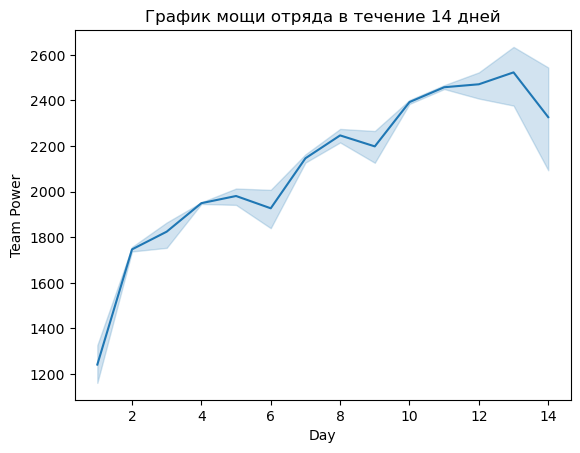

In [73]:
lineplot_day_x_team_power
sns.lineplot(data = lineplot_day_x_team_power, x = 'Day', y = 'Team Power')
plt.title('График мощи отряда в течение 14 дней')

## Удаление этих строк не изменило график.

In [74]:
df.loc[(df['Day'] == 14) & (df['Team Power'] < 3000)]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Info,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
9971,2020-11-09,14,34,19,11,Raid,Enemy Raid,Смотрела инфу о врагах,2860.0,NaN,NaN,NaN,NaN,Victory,NaN,0,0,1426
9972,2020-11-09,14,34,19,11,Raid,Enemy Raid,NaN,2860.0,NaN,NaN,NaN,NaN,Victory,NaN,0,0,1426
9973,2020-11-09,14,34,19,11,Raid,Enemy Raid,NaN,2860.0,NaN,NaN,NaN,NaN,Defeat,NaN,0,0,1426
9974,2020-11-09,14,34,19,11,Raid,Enemy Raid,NaN,2860.0,NaN,NaN,NaN,NaN,Victory,NaN,0,0,1426
10039,2020-11-09,14,34,19,11,Tournament,Edit Team Finish,NaN,1320.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1426
10041,2020-11-09,14,34,19,11,Tournament,Start Battle,Rank 1614152,1320.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1426
10042,2020-11-09,14,34,19,11,Tournament,Finish Battle,Rank 274889,1320.0,NaN,NaN,NaN,NaN,Victory,NaN,0,0,1426
10044,2020-11-09,14,34,19,11,Tournament,Start Battle,Rank 274889,1320.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1426
10045,2020-11-09,14,34,19,11,Tournament,Finish Battle,Rank 247032,1320.0,NaN,NaN,NaN,NaN,Victory,NaN,0,0,1426
10047,2020-11-09,14,34,19,11,Tournament,Start Battle,Rank 247032,1320.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1426


## Чуть больше изучив датасет, пришел к выводу, что есть большое количество активностей, под которые игрок может менять состав отряда, из-за чего рост мощи тяжего проследить

## Решил избежать других активностей, выбрав только повышение уровня. График стал более плавным и можно заметить как изначально резко повышается мощь в начале игры и дальнее растет плавнее

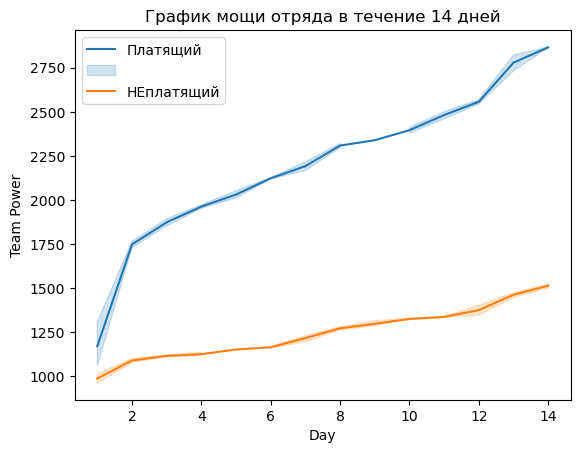

In [75]:
# Платящий игрок
lineplot_day_x_team_power = df[['Team Power', 'Day', 'Action']].loc[df['Action'] == 'Level Up']
sns.lineplot(data = lineplot_day_x_team_power, x = 'Day', y = 'Team Power')
plt.title('График мощи отряда в течение 14 дней')


# НЕплатящий игрок
lineplot_day_x_team_power2 = df_non_paying[['Team Power', 'Day', 'Action']].loc[df_non_paying['Action'] == 'Level Up']
sns.lineplot(data = lineplot_day_x_team_power2, x = 'Day', y = 'Team Power')
plt.title('График мощи отряда в течение 14 дней')
plt.legend(['Платящий', '', 'НЕплатящий'])

In [147]:
lineplot_day_x_team_power2['Team Power'].max()

1523.0

In [148]:
lineplot_day_x_team_power2['Team Power'].min()

914.0

# Смотрим распределение и проводим тест

<Axes: ylabel='Frequency'>

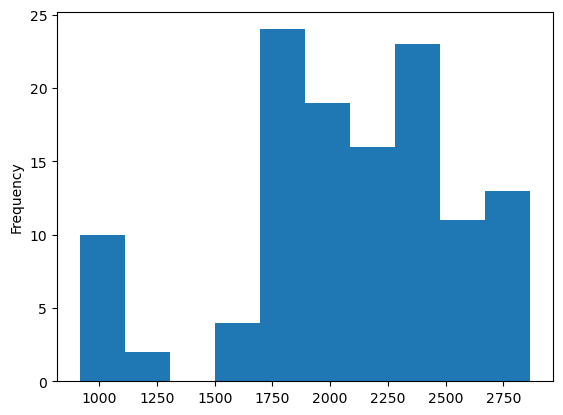

In [76]:
# Распределение мощи отряда для платящего пользователя
lineplot_day_x_team_power['Team Power'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

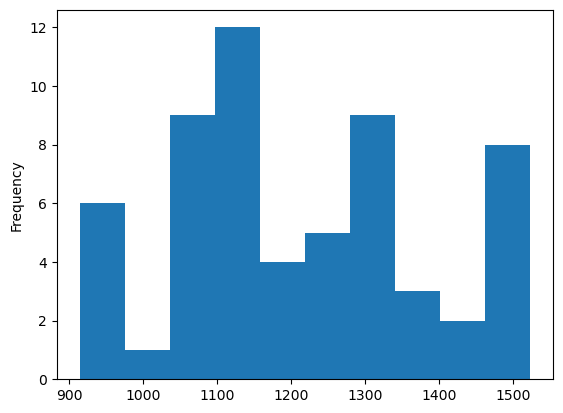

In [77]:
# Распределение мощи отряда для платящего пользователя
lineplot_day_x_team_power2['Team Power'].plot(kind = 'hist')

## Т.к. гистограмма показывает ненормальное распределение и количество пустых значений превышает количество заполненных, я предпочту удалить пустые, вместо того, чтобы заполнять их медианой
## Для нестандартного отклонения буду использовать непараметрические тесты

In [78]:
# Проверка на нормальность распределения
median_paying = lineplot_day_x_team_power['Team Power'].median()
pvalue = shapiro(lineplot_day_x_team_power['Team Power'].dropna())
pvalue2 = shapiro(lineplot_day_x_team_power['Team Power'].fillna(median_paying))
print(pvalue,'\n', pvalue2)

ShapiroResult(statistic=0.9489851593971252, pvalue=0.00015962148609105498) 
 ShapiroResult(statistic=0.7783927917480469, pvalue=4.097705930028971e-19)


### В любом случае, что я удаляю пустые строки, что заполняю их медианой, распределение ненормально, но мне кажется, если я их удалю, я не так сильно искажу данные

In [79]:
def stat_tests(sample1, sample2):
    
    # Непараметрический тест Манна-Уитни
    t_stat, p_value = mannwhitneyu(sample1, sample2)
    print('Тест Манна-Уитни:\n Test Stat = %.4f, p-value = %.4f' % (t_stat, p_value),'\n')
    
    # Тест Краскелла-Уоллиса
    t_stat, p_value = kruskal(sample1, sample2)
    print('Тест Краскелла-Уоллиса:\n Test Stat = %.4f, p-value = %.4f' % (t_stat, p_value),'\n')
    
    # Тест Колмогорова-Смирнова
    t_stat, p_value = stats.ks_2samp(sample1, sample2)
    print('Тест Колмогорова-Смирнова:\n Test Stat = %.4f, p-value = %.4f' % (t_stat, p_value),'\n')

In [80]:
sample1 = lineplot_day_x_team_power['Team Power'].dropna()
sample2 = lineplot_day_x_team_power2['Team Power'].dropna()
stat_tests(sample1, sample2)

Тест Манна-Уитни:
 Test Stat = 6627.0000, p-value = 0.0000 

Тест Краскелла-Уоллиса:
 Test Stat = 83.9873, p-value = 0.0000 

Тест Колмогорова-Смирнова:
 Test Stat = 0.9016, p-value = 0.0000 



### p-value в тесте Манна-Уитни, Краскелла-Уоллиса и Колмогорова-Смирнова равно 0, это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках

# Количество сессий

In [81]:
df.groupby('Day')['Session'].nunique ()

Day
1     3
2     4
3     3
4     3
5     3
6     1
7     3
8     2
9     2
10    2
11    2
12    2
13    3
14    2
Name: Session, dtype: int64

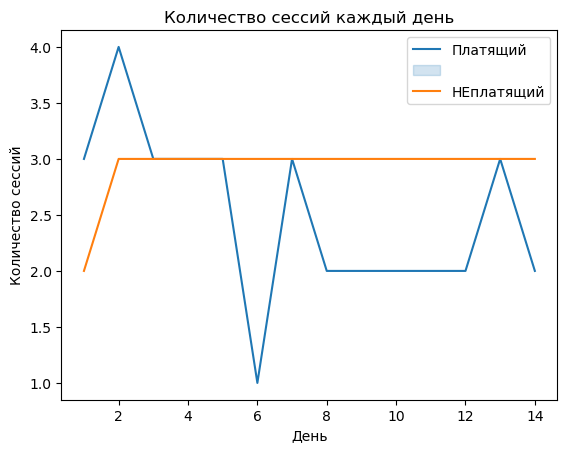

In [82]:
# Платящий игрок
lineplot_day_session = df.groupby('Day')['Session'].nunique ()
sns.lineplot(data = lineplot_day_session)
plt.title('Количество сессий каждый день')
plt.ylabel('Количество сессий')
plt.xlabel('День')

# НЕплатящий игрок
lineplot_day_session2 = df_non_paying.groupby('Day')['Session'].nunique ()
sns.lineplot(data = lineplot_day_session2)

plt.legend(['Платящий', '', 'НЕплатящий'])

### С первого дня у платящего игрока не менее 3 сессий. Почему-то на 6 день у игрока была лишь одна сессия. Далее он вернулся на прежний уровень, но возможно начался постепенный спад активности
### У неплатящего игрока все стабильно. Уже на второй день без каких-либо изменений по 3 сессии в день

<Axes: >

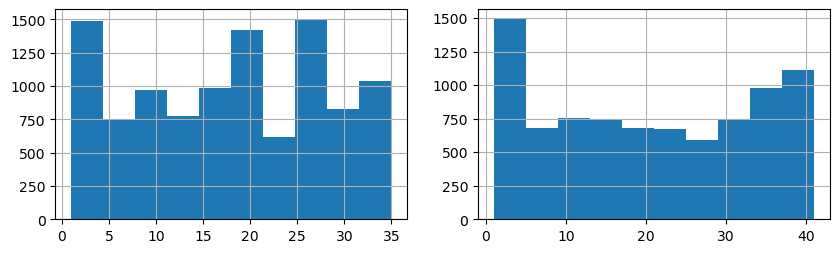

In [83]:
# Создаю 2 датафрейма на основе датафреймов платящего и неплатящего игрока, чтобы избежать 
# группировки в датафреймах, которые использовал для визуализации
day_session = df[['Day', 'Session']]
day_session2 = df_non_paying[['Day', 'Session']]

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(221)
day_session['Session'].hist(ax = ax1)

ax2 = fig.add_subplot(222)
day_session2['Session'].hist(ax = ax2)

In [84]:
print(day_session['Day'].isnull().sum())
print(day_session['Session'].isnull().sum())

0
0


In [85]:
# Проверка на нормальность распределения
pvalue = shapiro(day_session['Session'])
pvalue2 = shapiro(day_session2['Session'])
print(pvalue,'\n', pvalue2)

# p-value = 0, распределение ненормально

ShapiroResult(statistic=0.9532995223999023, pvalue=0.0) 
 ShapiroResult(statistic=0.928504467010498, pvalue=0.0)


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Пустые значения отсутсвуют, распределение ненормально, будем использовать непараметрические тесты

In [86]:
sample1 = day_session['Session']
sample2 = day_session2['Session']
stat_tests(sample1, sample2)

Тест Манна-Уитни:
 Test Stat = 39272780.0000, p-value = 0.0000 

Тест Краскелла-Уоллиса:
 Test Stat = 154.4377, p-value = 0.0000 

Тест Колмогорова-Смирнова:
 Test Stat = 0.1727, p-value = 0.0000 



### Ситуация такая же, как и с мощью отряда: p-value во всех тестах равно 0, это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках

# Главное здание и уровень игрока

In [87]:
df.groupby('Player Level')['Stronghold Level'].max()

Player Level
1      2
2      3
3      3
4      3
5      4
6      4
7      5
8      5
9      6
10     6
11     7
12     8
13     9
14    10
15    11
16    11
17    11
18    11
19    11
Name: Stronghold Level, dtype: int64

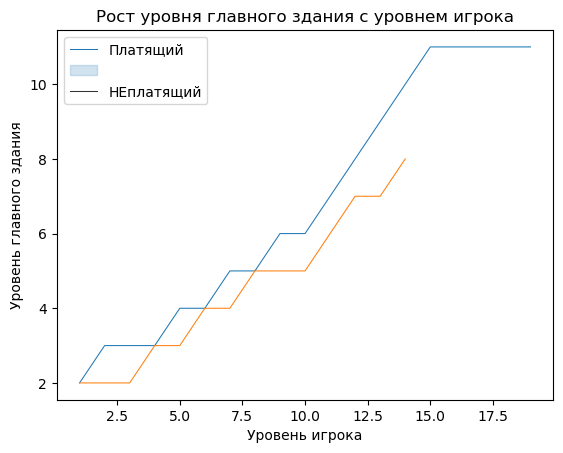

In [88]:
# Платящий игрок
lineplot_playerlvl_strongholdlvl = df.groupby('Player Level')['Stronghold Level'].max()
sns.lineplot(data = lineplot_playerlvl_strongholdlvl, x = lineplot_playerlvl_strongholdlvl.index,
            y = lineplot_playerlvl_strongholdlvl.values, size = 5)
plt.title('Рост уровня главного здания с уровнем игрока')
plt.ylabel('Уровень главного здания')
plt.xlabel('Уровень игрока')

# НЕплатящий игрок
lineplot_playerlvl_strongholdlvl2 = df_non_paying.groupby('Player Level')['Stronghold Level'].max()
sns.lineplot(data = lineplot_playerlvl_strongholdlvl2, x = lineplot_playerlvl_strongholdlvl2.index,
            y = lineplot_playerlvl_strongholdlvl2.values, size = 5)

plt.legend(['Платящий', '', 'НЕплатящий'])

# Количество героев разного уровня с уровнем игрока

In [89]:
# Платящий игрок
pvt_player_level_x_hero_level = pd.pivot_table(data = df, index = 'Player Level', columns = 'Level', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_level

Level,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,43,44,45,46,48,49,50,52,57,60,Max
Player Level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,22,13,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,7,8,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,13,3,5,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,33,7,6,3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4,31,2,4,5,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,43,1,5,8,6,0,0,0,0,0,0,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,44,7,4,3,5,3,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
# НЕплатящий игрок
pvt_player_level_x_hero_level2 = pd.pivot_table(data = df_non_paying, index = 'Player Level', columns = 'Level', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_level2

Level,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,19,20,22,24,25,29,30,33,37,40,1481,Max
Player Level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11,18,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,16,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,8,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,10,4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,23,12,6,2,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,20,4,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,28,2,11,10,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1
8,4,39,2,3,7,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
9,0,45,2,3,10,8,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


### Уровень 1481? Явно баг

In [130]:
df_non_paying.loc[df_non_paying['Level'] == 1481]

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
7780,2020-10-26,13,38,14,7,Raid,Start Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,NaN,NaN,0,0,40
7781,2020-10-26,13,38,14,7,Raid,Finish Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,Defeat,NaN,0,0,40
7785,2020-10-26,13,38,14,7,Raid,Start Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,NaN,NaN,0,0,40
7786,2020-10-26,13,38,14,7,Raid,Finish Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,Defeat,NaN,0,0,40
7790,2020-10-26,13,38,14,7,Raid,Start Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,NaN,NaN,0,0,40
7791,2020-10-26,13,38,14,7,Raid,Finish Battle,NaN,Energy,NaN,NaN,NaN,1481,NaN,NaN,Victory,NaN,0,0,40


In [135]:
df_non_paying.loc[df_non_paying.index > 7777].head()

,Date,Day,Session,Player Level,Stronghold Level,Tag,Action,Shortage1,Ended1,New Experience,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
7778,2020-10-26,13,38,14,7,Raid,Enemy Search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,40
7779,2020-10-26,13,38,14,7,Raid,Reroll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,40
7780,2020-10-26,13,38,14,7,Raid,Start Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,NaN,NaN,0,0,40
7781,2020-10-26,13,38,14,7,Raid,Finish Battle,NaN,NaN,NaN,NaN,NaN,1481,NaN,NaN,Defeat,NaN,0,0,40
7782,2020-10-26,13,38,14,7,Raid,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,40


### Предшествующие и следующие строки с пустым значением уровня, поэтому я заменю значение 1481 на NaN

In [140]:
df_non_paying['Level'].replace(1481, np.NaN, inplace = True)

In [141]:
# НЕплатящий игрок
pvt_player_level_x_hero_level2 = pd.pivot_table(data = df_non_paying, index = 'Player Level', columns = 'Level', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_level2

Level,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,19,20,22,24,25,29,30,33,37,40,Max
Player Level,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11,18,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,16,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,8,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,10,4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,23,12,6,2,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,20,4,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,28,2,11,10,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1
8,4,39,2,3,7,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
9,0,45,2,3,10,8,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


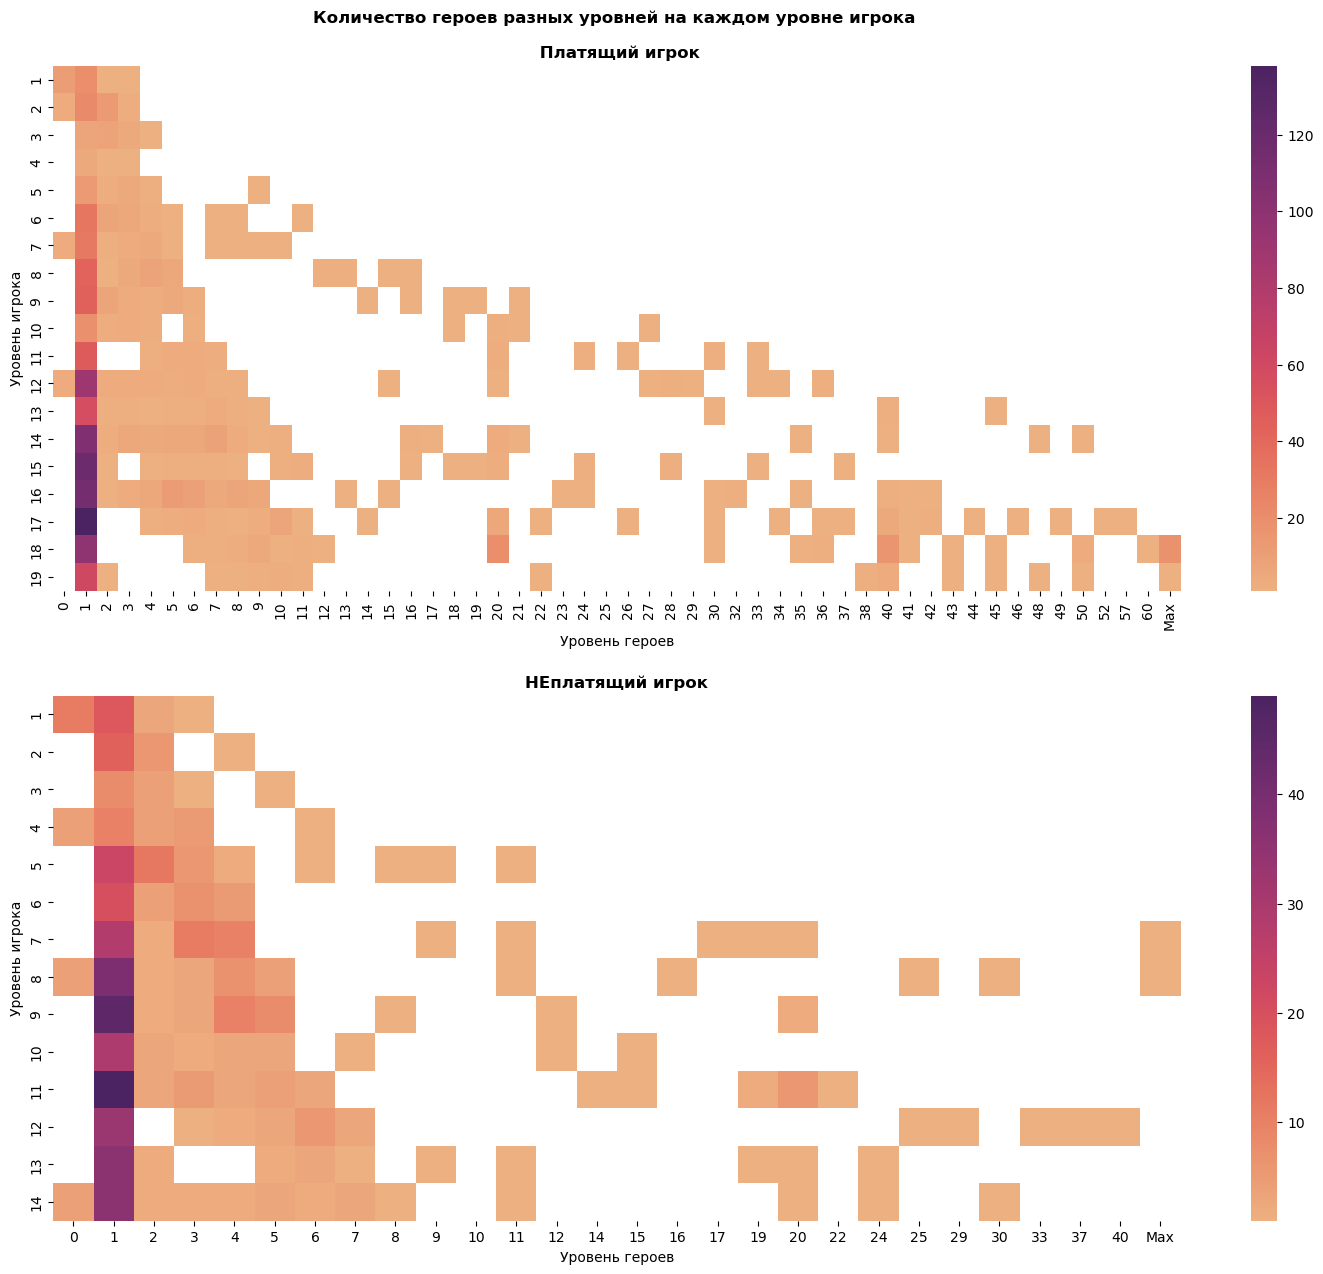

In [142]:
# Убираю нулевые значения из сводной таблицы, чтобы они не отображались на тепловой карте
pvt_player_level_x_hero_level[pvt_player_level_x_hero_level == 0] = np.nan
pvt_player_level_x_hero_level2[pvt_player_level_x_hero_level2 == 0] = np.nan

fig = plt.figure(figsize = (40,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_hero_level, cmap = 'flare', ax = ax1)
ax1.set_title('Количество героев разных уровней на каждом уровне игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень героев')
ax1.set_ylabel('Уровень игрока')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_player_level_x_hero_level2, cmap = 'flare', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уровень героев')
ax2.set_ylabel('Уровень игрока')
plt.show()

### Интересно заметить, что у неплатящего игрока уже на 7 и 8 уровне появились герои максимального уровня, когда у платящего они начали появляться только с 18 уровня

# Количество героев разной редкости

In [93]:
pvt_player_level_x_hero_rarity = pd.pivot_table(data = df, index = 'Player Level', columns = 'Rarity', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_rarity

Rarity,1.0,2.0,3.0,4.0,5.0
Player Level,,,,,
1,5,1,1,0,0
2,7,2,0,0,0
3,2,2,1,0,0
4,3,1,0,0,0
5,7,6,0,0,0
6,13,8,6,4,1
7,22,5,0,0,0
8,25,6,8,3,0
9,25,14,1,0,0


Text(0.5, 0, 'Уровень игрока')

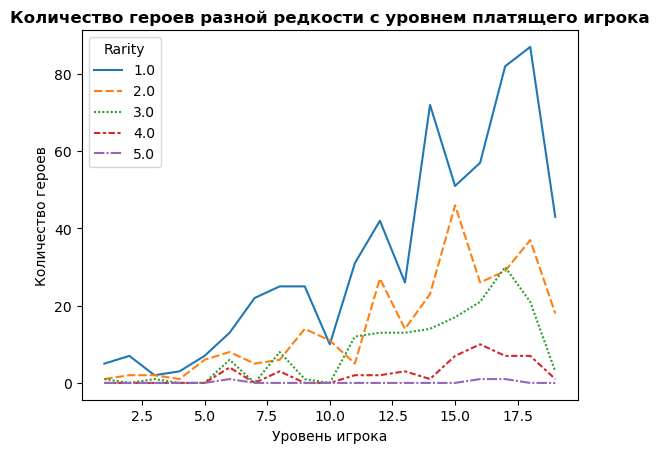

In [94]:
# Платящий игрок
sns.lineplot(data = pvt_player_level_x_hero_rarity)
plt.title('Количество героев разной редкости с уровнем платящего игрока', fontweight = 'bold')
plt.ylabel('Количество героев')
plt.xlabel('Уровень игрока')

## Резкий спад всех героев всех редкостей, приближаясь к 19 уровню? Ради улучшения самых редких?
## Интересно заметить, что в какие-то моменты героев 3 редкости равно или больше числу героев 2 редкости, как на 1 уровне, 8, 11 и 17

In [95]:
pvt_player_level_x_hero_rarity2 = pd.pivot_table(data = df_non_paying, index = 'Player Level', columns = 'Rarity', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_rarity2

Rarity,1.0,2.0,3.0
Player Level,,,
1,2,1,1
2,9,2,0
3,5,1,0
4,3,2,0
5,11,8,0
6,12,6,1
7,19,10,0
8,28,8,0
9,37,7,0


Text(0.5, 0, 'Уровень игрока')

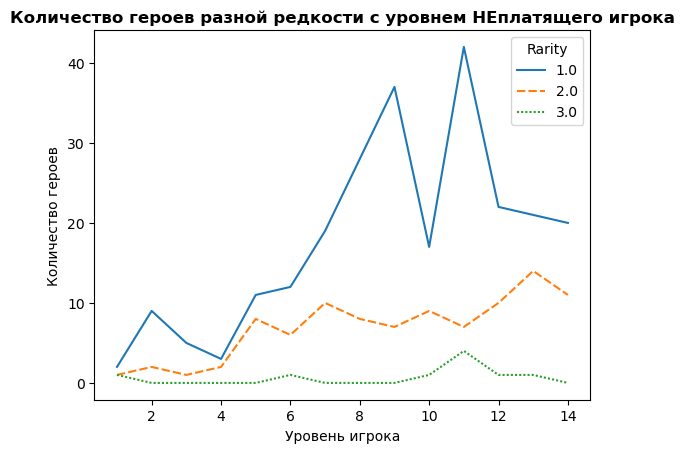

In [96]:
# НЕплатящий игрок
sns.lineplot(data = pvt_player_level_x_hero_rarity2)
plt.title('Количество героев разной редкости с уровнем НЕплатящего игрока', fontweight = 'bold')
plt.ylabel('Количество героев')
plt.xlabel('Уровень игрока')

### Вполне очевидная картина, что у неплатящего игрока преимущественно герои малой редкости

# Как заработаны гемы

In [97]:
# Платящий игрок
barplot_tag_gems = df.loc[df['Gems+'] > 0].groupby('Tag')['Gems+'].sum()
barplot_tag_gems

Tag
Alliance            25
Alliance Wars        4
Base               100
Mail                30
Missions           286
Mystic Vision       24
Path of Valor      550
Player             180
Purchase         70050
VIP                420
Name: Gems+, dtype: int64

In [98]:
# НЕплатящий игрок
barplot_tag_gems2 = df_non_paying.loc[df_non_paying['Gems+'] > 0].groupby('Tag')['Gems+'].sum()
barplot_tag_gems2

Tag
Alliance          15
Alliance Wars      3
Base             100
Mail              30
Missions         210
Mystic Vision     34
Path of Valor     50
Player           130
Quests            17
Name: Gems+, dtype: int64

Text(0, 0.5, 'Активность')

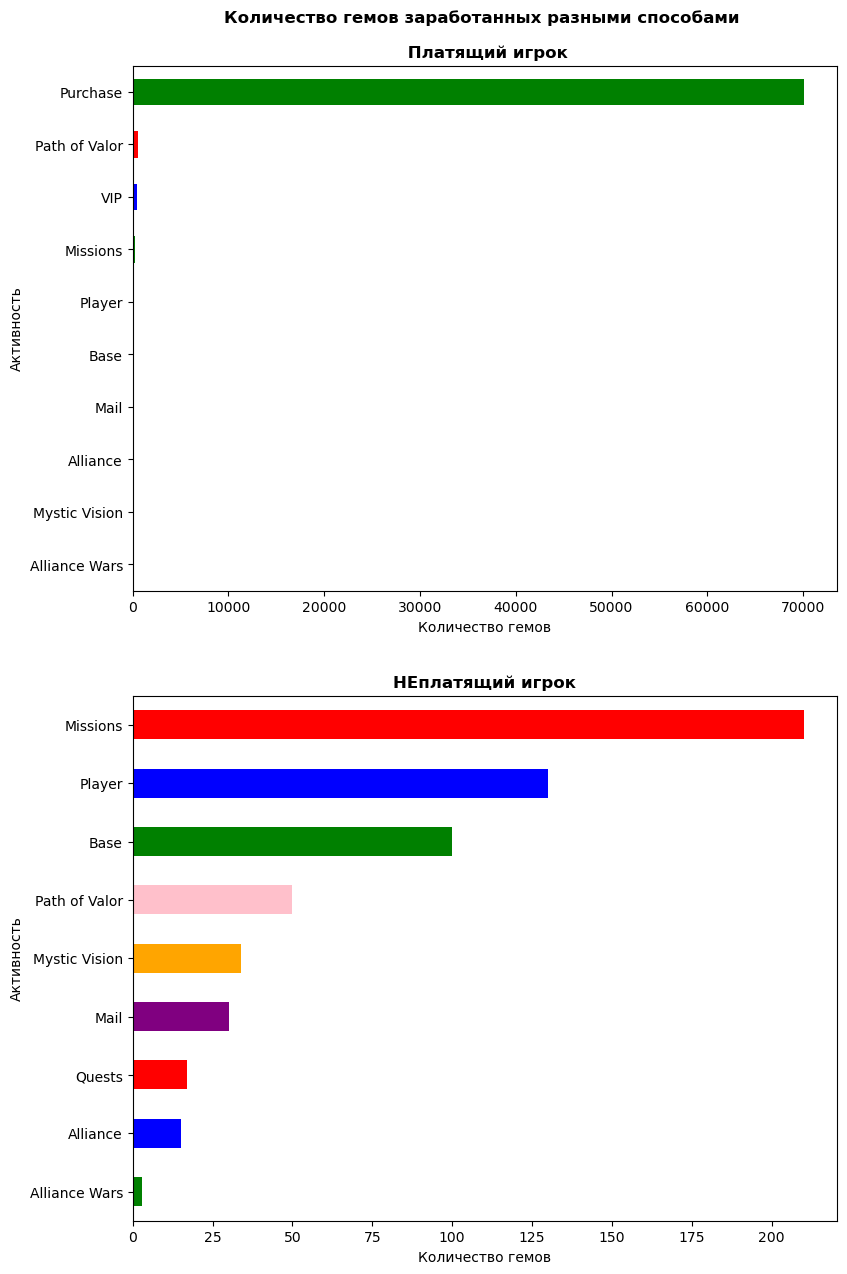

In [99]:
fig = plt.figure(figsize = (20,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
barplot_tag_gems.sort_values().plot(kind = 'barh', color = ['g', 'b', 'r'], ax = ax1)
ax1.set_title('Количество гемов заработанных разными способами \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Количество гемов')
ax1.set_ylabel('Активность')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
barplot_tag_gems2.sort_values().plot(kind = 'barh', color = ['g', 'b', 'r', 'purple', 'orange', 'pink'], ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Количество гемов')
ax2.set_ylabel('Активность')


### Если неплатящий игрок преимущественно получает гемы за миссии, достижения?, обустройство базы и другие активности, то платящий игрок за покупаемые паки, боевой пропуск? и ВИП награды

In [155]:
lineplot_day_gems_balance = df[['Day', 'Gems Balance']].drop_duplicates()

In [169]:
lineplot_day_gems_balance2['Gems Balance'].max()

350

In [101]:
lineplot_day_gems_balance2 = df_non_paying[['Day', 'Gems Balance']].drop_duplicates()

Text(0, 0.5, 'Баланс')

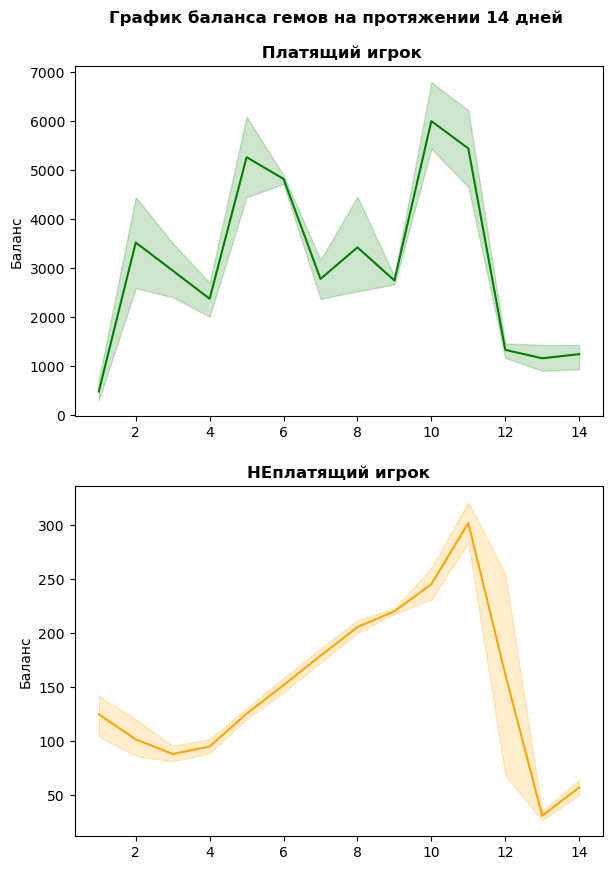

In [161]:
fig = plt.figure(figsize = (15,10))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.lineplot(data = lineplot_day_gems_balance, x = 'Day', y = 'Gems Balance', color = 'g', ax = ax1)
ax1.set_title('График баланса гемов на протяжении 14 дней \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('')
ax1.set_ylabel('Баланс')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.lineplot(data = lineplot_day_gems_balance2, x = 'Day', y = 'Gems Balance', color = 'orange', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('')
ax2.set_ylabel('Баланс')


<Axes: >

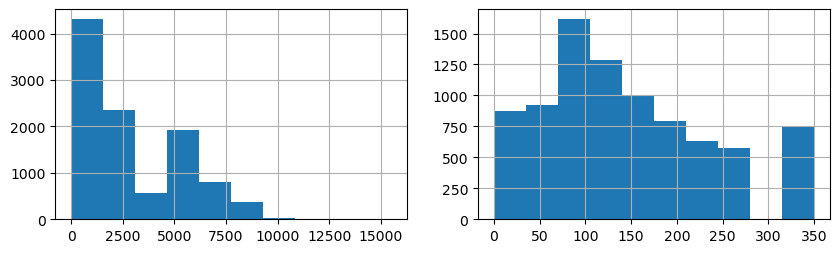

In [103]:
day_gems_balance = df[['Day', 'Gems Balance']]
day_gems_balance2 = df_non_paying[['Day', 'Gems Balance']]

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(221)
day_gems_balance['Gems Balance'].hist(ax = ax1)

ax2 = fig.add_subplot(222)
day_gems_balance2['Gems Balance'].hist(ax = ax2)

In [104]:
# Проверка на нормальность распределения
p_value = shapiro(day_gems_balance['Gems Balance'])
p_value2 = shapiro(day_gems_balance2['Gems Balance'])
print(p_value,'\n', p_value2)
# p-value = 0, распределение ненормально

ShapiroResult(statistic=0.905238151550293, pvalue=0.0) 
 ShapiroResult(statistic=0.9461922645568848, pvalue=0.0)


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [105]:
sample1 = day_gems_balance['Gems Balance']
sample2 = day_gems_balance2['Gems Balance']
stat_tests(sample1, sample2)

Тест Манна-Уитни:
 Test Stat = 84150884.0000, p-value = 0.0000 

Тест Краскелла-Уоллиса:
 Test Stat = 11770.5822, p-value = 0.0000 

Тест Колмогорова-Смирнова:
 Test Stat = 0.9242, p-value = 0.0000 



### Ситуация такая же, как и с предыдущими тестами: p-value во всех тестах равно 0, это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках

# На что платящий игрок тратил деньги

In [106]:
df.loc[df['Tag'] == 'Purchase'].groupby('Action')['Tag'].count()

Action
10000 Gems $99.99                       4
2800 Gems $29.99                        1
4800 Gems $49.99                        1
Amazing Action Pack $49.99              1
Atlantis Deal $9.99                     1
Atlantis Offer $1.99                    2
Cat's Contraptions, 1/2 $4.99           3
Cat's Contraptions, 2/2 $19.99          1
Fantastic Fury Pack $19.99              1
Halloween Offers Day 11, 1/2 $2.99      3
Halloween Offers Day 11, 2/2 $29.99     1
Halloween Offers Day 14 Free            1
Halloween Offers Day 4 $29.99           1
Halloween Offers Day 6, 1/2 $2.99       2
Halloween Offers Day 6, 2/2 $99.99      1
Halloween Offers Day 7 Free             1
New Hero                               50
Pop-Up                                  5
Pop-up                                 19
Power Player Pack $29.99                1
Stardust Offer $1.99                    1
Super Starter Pack $4.99                1
Ultimate Tournament Offer $29.99        1
VIP 30 Day Pass $4.99      

## 2 разных Pop-up?

In [107]:
df['Action'].replace('Pop-up', 'Pop-Up', inplace = True)
# Корректирую в 1 Pop-Up, чтобы не портить статистику. Остальное корректно

In [108]:
barplot_purchase_action = df.loc[df['Tag'] == 'Purchase'].groupby('Action')['Tag'].count()
barplot_purchase_action

Action
10000 Gems $99.99                       4
2800 Gems $29.99                        1
4800 Gems $49.99                        1
Amazing Action Pack $49.99              1
Atlantis Deal $9.99                     1
Atlantis Offer $1.99                    2
Cat's Contraptions, 1/2 $4.99           3
Cat's Contraptions, 2/2 $19.99          1
Fantastic Fury Pack $19.99              1
Halloween Offers Day 11, 1/2 $2.99      3
Halloween Offers Day 11, 2/2 $29.99     1
Halloween Offers Day 14 Free            1
Halloween Offers Day 4 $29.99           1
Halloween Offers Day 6, 1/2 $2.99       2
Halloween Offers Day 6, 2/2 $99.99      1
Halloween Offers Day 7 Free             1
New Hero                               50
Pop-Up                                 24
Power Player Pack $29.99                1
Stardust Offer $1.99                    1
Super Starter Pack $4.99                1
Ultimate Tournament Offer $29.99        1
VIP 30 Day Pass $4.99                   1
Valor Pass $9.99           

In [109]:
barplot_purchase_action = barplot_purchase_action.reset_index()
barplot_purchase_action

,Action,Tag
0,10000 Gems $99.99,4
1,2800 Gems $29.99,1
2,4800 Gems $49.99,1
3,Amazing Action Pack $49.99,1
4,Atlantis Deal $9.99,1
5,Atlantis Offer $1.99,2
6,"Cat's Contraptions, 1/2 $4.99",3
7,"Cat's Contraptions, 2/2 $19.99",1
8,Fantastic Fury Pack $19.99,1
9,"Halloween Offers Day 11, 1/2 $2.99",3


Text(0.5, 0, 'Количество раз')

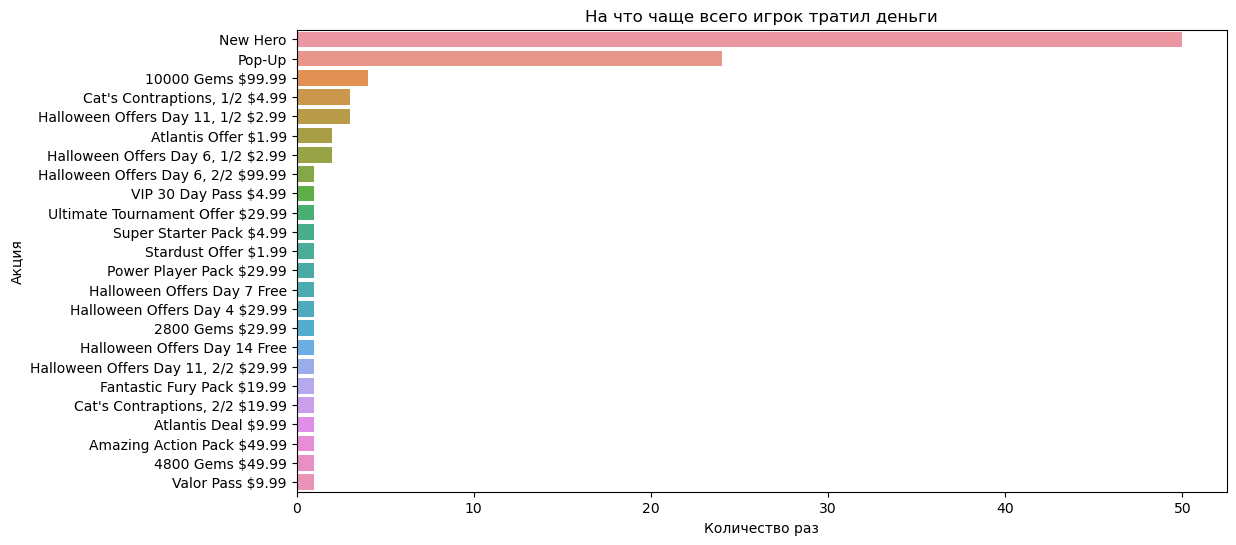

In [110]:
barplot_purchase_action.sort_values(by = 'Tag', ascending = False, inplace = True)
plt.figure(figsize = (12,6))
sns.barplot(data = barplot_purchase_action, x = 'Tag', y = 'Action', orient = 'h')
plt.title('На что чаще всего игрок тратил деньги')
plt.ylabel('Акция')
plt.xlabel('Количество раз')

## Чаще всего игрок тратил деньги на покупку новых героев, всплываемые акции и 10000 гемов 

# Теперь узнаем, на что тратились приобретенные гемы

In [111]:
scatterplot_gems_tag_action = df.loc[df['Gems-'] < 0].groupby(by = ['Tag', 'Action'])['Action'].count()

In [112]:
scatterplot_gems_tag_action2 = df_non_paying.loc[df_non_paying['Gems-'] < 0].groupby(by = ['Tag', 'Action'])['Action'].count()

In [113]:
#Платящий игрок
scatterplot_gems_tag_action = scatterplot_gems_tag_action.reset_index(0)
scatterplot_gems_tag_action

,Tag,Action
Action,,
Speed Up,Building,36
Hero Cap,Buy,7
Antidotes,Buy bi,1
Bomb Attack,Buy bi,1
Dragon Banner,Buy bi,1
Hunter's Special,Buy bi,1
Offer Hunter's Special,Buy bi,4
Revive Scroll,Buy bi,1
Super Healing Potion,Buy bi,1


In [114]:
# НЕплатящий игрок
scatterplot_gems_tag_action2 = scatterplot_gems_tag_action2.reset_index(0)
scatterplot_gems_tag_action2

,Tag,Action
Action,,
Speed Up,Building,2
Food,Buy,3
Valhalla Summon,Summon,1
Research Speed Up,Train,2
Speed Up,Train,5


Text(0, 0.5, '')

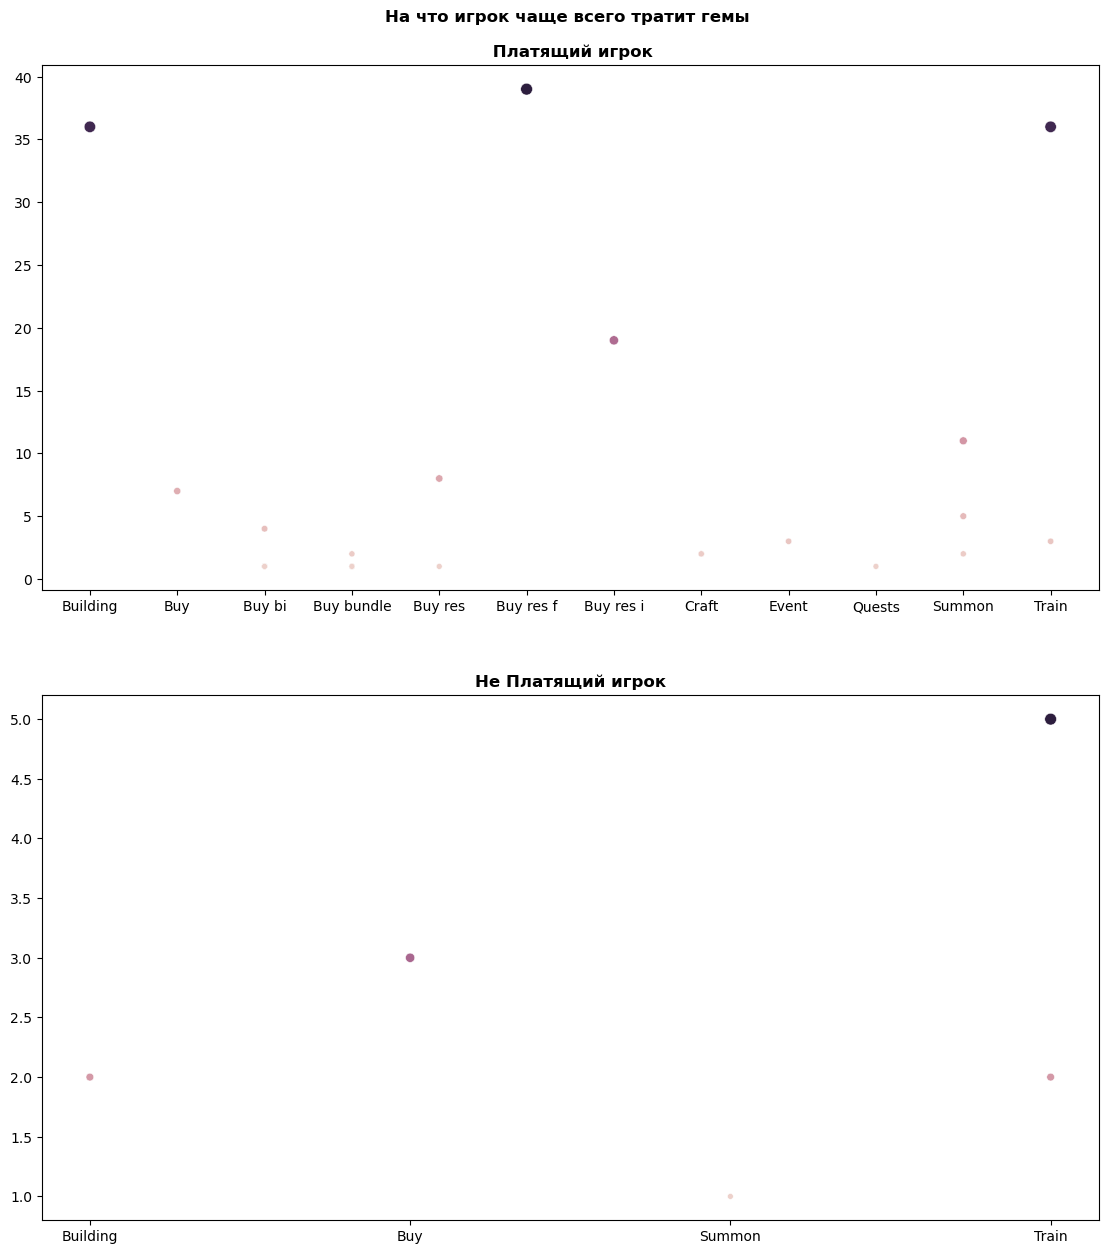

In [143]:
fig = plt.figure(figsize = (30,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.scatterplot(data = scatterplot_gems_tag_action, x = 'Tag', y = 'Action', hue = 'Action', size = 'Action', legend = '')
ax1.set_title('На что игрок чаще всего тратит гемы \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('')
ax1.set_ylabel('')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.scatterplot(data = scatterplot_gems_tag_action2, x = 'Tag', y = 'Action', hue = 'Action', size = 'Action', legend = '')
ax2.set_title('Не Платящий игрок', fontweight = 'bold')
ax2.set_xlabel('')
ax2.set_ylabel('')

### Примечательно, что оба игрока предпочитают тратить свои гемы на ускорение тренировки. Неплатящий игрок не способен потратить гемы на большое количество активностей, кроме как на покупку недостающих ресурсов, ускорение построек и изредка на призывы героев.
### В это же время платящий игрок, помимо ускорения тренировок, более 30 раз тратил гемы на ускорение построек и покупку недостающей пищи и менее, но заметно, железа

# Сколько игроки получали гемов ежедневно

In [116]:
df[['Day', 'Gems+']].loc[(df['Gems+']>0) & (df['Day']== 1)]

,Day,Gems+
27,1,100
153,1,3
173,1,5
236,1,10
283,1,3
321,1,5
346,1,1
415,1,30
461,1,5
462,1,3


In [117]:
barplot_day_gems = df.groupby('Day')['Gems+'].sum().reset_index()
barplot_day_gems2 = df_non_paying.groupby('Day')['Gems+'].sum().reset_index()

In [118]:
barplot_day_gems

,Day,Gems+
0,1,3632
1,2,10103
2,3,2877
3,4,2359
4,5,10205
5,6,80
6,7,8092
7,8,10252
8,9,37
9,10,14759


In [119]:
barplot_day_gems2

,Day,Gems+
0,1,171
1,2,34
2,3,30
3,4,32
4,5,23
5,6,30
6,7,30
7,8,19
8,9,9
9,10,43


Text(0, 0.5, 'Количество гемов')

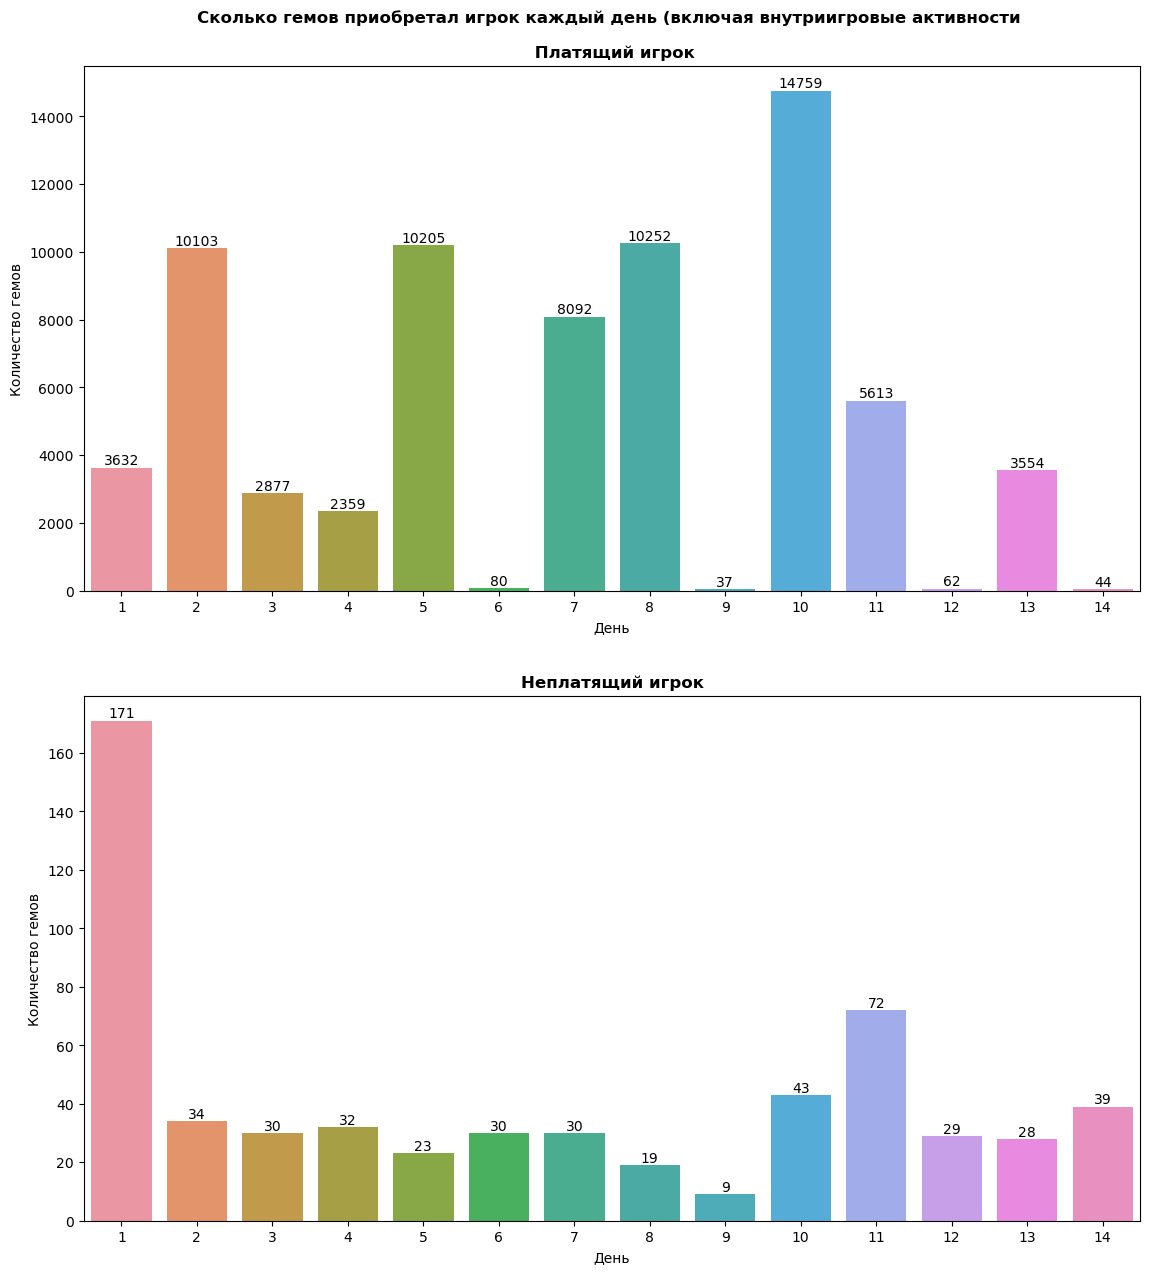

In [120]:
fig = plt.figure(figsize = (30,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.barplot(data = barplot_day_gems, x = 'Day', y = 'Gems+', ax = ax1)
ax1.set_title('Сколько гемов приобретал игрок каждый день (включая внутриигровые активности \n\n Платящий игрок',
              fontweight = 'bold')
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.set_xlabel('День')
ax1.set_ylabel('Количество гемов')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.barplot(data = barplot_day_gems2, x = 'Day', y = 'Gems+', ax = ax2)
ax2.set_title('Неплатящий игрок',
              fontweight = 'bold')
for i in ax2.containers:
    ax2.bar_label(i,)
ax2.set_xlabel('День')
ax2.set_ylabel('Количество гемов')

### Самый пик у платящего игрока по приобретению гемов был на 10 день
### Стоить обратить внимание, что на 6, 9, 12 и 14 дни платящий игрок не приобретал отдельно гемы или не покупал бадлы, в которых так же находились гемы
### Неплатящий же игрок наибольшее количество гемов получил в 1 день и далее за внутриигровые активности

In [121]:
print(df[['Day', 'Gems+']].isnull().sum())
print(df_non_paying[['Day', 'Gems+']].isnull().sum())

Day      0
Gems+    0
dtype: int64
Day      0
Gems+    0
dtype: int64


<Axes: >

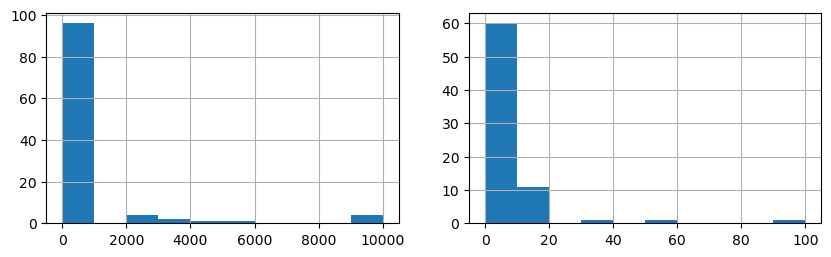

In [122]:
day_gems_plus = df[['Day', 'Gems+']].drop_duplicates()
day_gems_plus2 = df_non_paying[['Day', 'Gems+']].drop_duplicates()

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(221)
day_gems_plus['Gems+'].hist(ax = ax1)

ax2 = fig.add_subplot(222)
day_gems_plus2['Gems+'].hist(ax = ax2)

In [123]:
# Проверка на нормальность распределения
p_value = shapiro(day_gems_plus['Gems+'])
p_value2 = shapiro(day_gems_plus2['Gems+'])
print(p_value,'\n', p_value2)
# p-value < 0.05, распределение ненормально

ShapiroResult(statistic=0.34950387477874756, pvalue=9.607802981205718e-20) 
 ShapiroResult(statistic=0.36824238300323486, pvalue=3.126919004182592e-16)


In [124]:
sample1 = day_gems_plus['Gems+']
sample2 = day_gems_plus2['Gems+']
stat_tests(sample1, sample2)

Тест Манна-Уитни:
 Test Stat = 5349.0000, p-value = 0.0001 

Тест Краскелла-Уоллиса:
 Test Stat = 15.2281, p-value = 0.0001 

Тест Колмогорова-Смирнова:
 Test Stat = 0.3113, p-value = 0.0003 



### Ситуация похожа: p-value не во всех тестах равен 0, но меньше 0.05, значит мы отвергаем нулевую гипотезу о равенстве средних, равенстве рангов, равенстве дисперсий. Это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках